# Jump detection algorithm and Jump height estimation logic

### Import packages 

In [105]:
import pandas as pd 
import csv
import time
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

### Load data 

In [106]:

# def load_clean_csv(path):
#     df = pd.read_csv(path, skiprows=1)
    
#     # Remove rows where 'Timestamp' is not a valid number
#     df = df[pd.to_numeric(df['Timestamp'], errors='coerce').notnull()]
    
#     # Convert to float
#     df['Timestamp'] = df['Timestamp'].astype(float)
    
#     return df.reset_index(drop=True)

#Base path
base_path = '/Users/thomasjohnson/Desktop/Sports Tech/CM2024 - Project course/JumpPro'


# Chest sensor
df_chest_acc  = pd.read_csv(f'{base_path}/Jonatan Chest/Acc-2025_04_04-11_32_45.csv', skiprows=1)
df_chest_gyro = pd.read_csv(f'{base_path}/Jonatan Chest/Gyro-2025_04_04-11_32_45.csv', skiprows=1)
df_chest_mag  = pd.read_csv(f'{base_path}/Jonatan Chest/Magn-2025_04_04-11_32_45.csv', skiprows=1)

# Assimilate df_chest dataframes into one dataframe
df_chest = pd.DataFrame(
    { 'Timestamp': df_chest_acc['Timestamp'],
      'AccX': df_chest_acc['AccX'],
      'AccY': df_chest_acc['AccY'],
      'AccZ': df_chest_acc['AccZ'],
      'GyroX': df_chest_gyro['GyroX'],
      'GyroY': df_chest_gyro['GyroY'],
      'GyroZ': df_chest_gyro['GyroZ'],
      'MagX': df_chest_mag['MagnX'],
      'MagY': df_chest_mag['MagnY'],
      'MagZ': df_chest_mag['MagnZ']
    }
)
# Wrist sensor
df_wrist_acc  = pd.read_csv(f'{base_path}/Jonatan Wrist/Acc-2025_04_04-11_32_45.csv', skiprows=1)
df_wrist_gyro = pd.read_csv(f'{base_path}/Jonatan Wrist/Gyro-2025_04_04-11_32_45.csv', skiprows=1)
df_wrist_mag  = pd.read_csv(f'{base_path}/Jonatan Wrist/Magn-2025_04_04-11_32_45.csv', skiprows=1)

df_wrist = pd.DataFrame(
    { 'Timestamp': df_wrist_acc['Timestamp'],
      'AccX_wrist': df_wrist_acc['AccX'],
      'AccY_wrist': df_wrist_acc['AccY'],
      'AccZ_wrist': df_wrist_acc['AccZ'],
      'GyroX_wrist': df_wrist_gyro['GyroX'],
      'GyroY_wrist': df_wrist_gyro['GyroY'],
      'GyroZ_wrist': df_wrist_gyro['GyroZ'],
      'MagX_wrist': df_wrist_mag['MagnX'],
      'MagY_wrist': df_wrist_mag['MagnY'],
      'MagZ_wrist': df_wrist_mag['MagnZ']
    }
)



In [107]:
df_chest.head()

,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagX,MagY,MagZ
0,1743758128.013,-9.475916,2.962420,0.875804,-1.68,9.24,-3.01,-49.999092,40.282463,-107.336571
1,1743758128.013,-9.499846,3.005492,0.990664,-1.61,10.43,-4.48,-49.099010,39.597252,-107.464066
2,1743758128.013,-9.413700,3.034207,1.028950,-1.26,10.43,-4.41,-49.960094,41.610809,-106.540619
3,1743758128.013,-9.475916,2.981564,1.033736,-0.49,8.82,-4.06,-49.978935,41.606842,-107.101944
4,1743758128.092,-9.423272,2.962420,1.052880,-0.70,7.00,-3.78,-49.922070,37.859406,-109.308662


In [108]:
df_wrist.head()

,Timestamp,AccX_wrist,AccY_wrist,AccZ_wrist,GyroX_wrist,GyroY_wrist,GyroZ_wrist,MagX_wrist,MagY_wrist,MagZ_wrist
0,1743758136.83,4.493881,-3.776009,7.934883,0.91,-1.75,-0.28,62.407127,-103.797234,92.489777
1,1743758136.83,4.603955,-3.752080,7.949241,0.14,-3.64,0.14,59.741192,-99.933456,89.687904
2,1743758136.83,4.536954,-3.723365,7.930098,-0.42,-4.13,0.49,60.905399,-103.841690,89.688240
3,1743758136.83,4.551311,-3.665935,7.901382,-0.63,-3.01,0.63,59.794209,-103.122139,89.683044
4,1743758136.903,4.335949,-3.689864,7.843953,-0.91,-3.36,1.19,59.767700,-101.527802,89.685478


In [109]:
# Align lengths by truncating the longer dataframe
min_len = min(len(df_chest), len(df_wrist))

# Truncate both dataframes to the minimum length
df_chest = df_chest.iloc[:min_len].reset_index(drop=True)
df_wrist = df_wrist.iloc[:min_len].reset_index(drop=True)

# # Add a common time index
# # Ensure timestamps are numeric before converting to datetime
# df_chest['Timestamp'] = pd.to_numeric(df_chest['Timestamp'], errors='coerce')
# df_chest = df_chest.dropna(subset=['Timestamp'])  # drop bad rows
# df_chest['Time'] = pd.to_datetime(df_chest['Timestamp'], unit='ms')

# df_wrist['Timestamp'] = pd.to_numeric(df_wrist['Timestamp'], errors='coerce')
# df_wrist = df_wrist.dropna(subset=['Timestamp'])  # drop bad rows
# df_wrist['Time'] = pd.to_datetime(df_wrist['Timestamp'], unit='ms')

# df_chest.set_index('Time', inplace=True)
# df_wrist.set_index('Time', inplace=True)

# Merge dataframes on the common time index
df_sync = pd.concat([df_chest, df_wrist], axis=1)


In [110]:
df_sync.head(10)

,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagX,MagY,MagZ,Timestamp,AccX_wrist,AccY_wrist,AccZ_wrist,GyroX_wrist,GyroY_wrist,GyroZ_wrist,MagX_wrist,MagY_wrist,MagZ_wrist
0,1743758128.013,-9.475916,2.962420,0.875804,-1.68,9.24,-3.01,-49.999092,40.282463,-107.336571,1743758136.83,4.493881,-3.776009,7.934883,0.91,-1.75,-0.28,62.407127,-103.797234,92.489777
1,1743758128.013,-9.499846,3.005492,0.990664,-1.61,10.43,-4.48,-49.099010,39.597252,-107.464066,1743758136.83,4.603955,-3.752080,7.949241,0.14,-3.64,0.14,59.741192,-99.933456,89.687904
2,1743758128.013,-9.413700,3.034207,1.028950,-1.26,10.43,-4.41,-49.960094,41.610809,-106.540619,1743758136.83,4.536954,-3.723365,7.930098,-0.42,-4.13,0.49,60.905399,-103.841690,89.688240
3,1743758128.013,-9.475916,2.981564,1.033736,-0.49,8.82,-4.06,-49.978935,41.606842,-107.101944,1743758136.83,4.551311,-3.665935,7.901382,-0.63,-3.01,0.63,59.794209,-103.122139,89.683044
4,1743758128.092,-9.423272,2.962420,1.052880,-0.70,7.00,-3.78,-49.922070,37.859406,-109.308662,1743758136.903,4.335949,-3.689864,7.843953,-0.91,-3.36,1.19,59.767700,-101.527802,89.685478
5,1743758128.092,-9.198339,3.048565,1.048094,-2.45,4.76,-2.31,-50.735168,40.923420,-108.479698,1743758136.903,4.489096,-3.555861,7.877453,-1.40,-3.01,0.14,60.914928,-99.319702,91.190697
6,1743758128.092,-9.322770,3.015064,1.024165,-3.01,2.03,-0.70,-51.563717,42.664040,-107.745033,1743758136.903,4.297663,-3.737722,7.858310,-2.03,-2.38,0.14,60.635677,-101.660210,90.917862
7,1743758128.092,-9.241411,3.019850,0.899733,-3.50,2.38,1.19,-51.835297,38.725235,-108.581619,1743758136.903,4.230661,-3.670721,7.877453,-2.87,-3.92,-0.35,62.006390,-101.083763,92.132355
8,1743758128.17,-9.566847,2.675271,0.880590,-1.68,2.31,3.29,-49.932270,41.336884,-106.869736,1743758136.976,4.393379,-3.742508,7.939669,-4.34,-7.77,-0.70,60.224201,-100.269119,90.606468
9,1743758128.17,-9.317985,2.660914,1.005021,5.32,4.20,1.61,-49.021122,37.733944,-107.093964,1743758136.976,4.489096,-3.876511,7.776951,-6.44,-10.36,-2.80,60.224201,-100.269119,90.606468


### Synchronise dataframes

In [111]:
# Ensure numeric timestamps
df_chest['Timestamp'] = pd.to_numeric(df_chest['Timestamp'], errors='coerce')
df_wrist['Timestamp'] = pd.to_numeric(df_wrist['Timestamp'], errors='coerce')

df_chest.dropna(subset=['Timestamp'], inplace=True)
df_wrist.dropna(subset=['Timestamp'], inplace=True)

# Find wrist start time
wrist_start_time = df_wrist['Timestamp'].iloc[0]

# Trim chest data to start at wrist start time
df_chest_trimmed = df_chest[df_chest['Timestamp'] >= wrist_start_time].copy()

# Trim both dataframes to same length
min_len = min(len(df_chest_trimmed), len(df_wrist))

df_chest_aligned = df_chest_trimmed.iloc[:min_len].reset_index(drop=True)
df_wrist_aligned = df_wrist.iloc[:min_len].reset_index(drop=True)

# Create shared time column starting at t = 0
df_chest_aligned['time'] = (df_chest_aligned['Timestamp'] - wrist_start_time) 
df_wrist_aligned['time'] = (df_wrist_aligned['Timestamp'] - wrist_start_time) 

# Merge for convenience (optional)
df_sync = pd.concat([df_chest_aligned.reset_index(drop=True),
                     df_wrist_aligned.drop(columns=['Timestamp', 'time'])],
                     axis=1)


In [112]:
df_sync.head(10)

,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagX,MagY,MagZ,time,AccX_wrist,AccY_wrist,AccZ_wrist,GyroX_wrist,GyroY_wrist,GyroZ_wrist,MagX_wrist,MagY_wrist,MagZ_wrist
0,1.743758e+09,-9.485488,2.876276,0.071787,1.19,6.58,-3.85,-43.433952,35.139660,-90.348404,0.002,4.493881,-3.776009,7.934883,0.91,-1.75,-0.28,62.407127,-103.797234,92.489777
1,1.743758e+09,-9.552489,2.900205,0.057430,1.33,5.67,-3.78,-46.045124,37.415047,-92.310722,0.002,4.603955,-3.752080,7.949241,0.14,-3.64,0.14,59.741192,-99.933456,89.687904
2,1.743758e+09,-9.533346,2.919348,0.062216,-0.28,4.55,-2.59,-43.501209,33.805370,-91.986336,0.002,4.536954,-3.723365,7.930098,-0.42,-4.13,0.49,60.905399,-103.841690,89.688240
3,1.743758e+09,-9.676920,2.943277,0.043072,-1.12,2.45,-1.26,-44.075375,36.561115,-91.353806,0.002,4.551311,-3.665935,7.901382,-0.63,-3.01,0.63,59.794209,-103.122139,89.683044
4,1.743758e+09,-9.533346,2.866704,0.062216,-2.03,1.19,1.40,-44.969860,38.287857,-92.583763,0.081,4.335949,-3.689864,7.843953,-0.91,-3.36,1.19,59.767700,-101.527802,89.685478
5,1.743758e+09,-9.748708,2.866704,-0.009572,-1.54,0.28,3.15,-43.608242,34.622185,-91.700645,0.081,4.489096,-3.555861,7.877453,-1.40,-3.01,0.14,60.914928,-99.319702,91.190697
6,1.743758e+09,-9.676920,2.861918,0.086145,-0.63,1.47,3.36,-43.818031,35.976944,-92.160011,0.081,4.297663,-3.737722,7.858310,-2.03,-2.38,0.14,60.635677,-101.660210,90.917862
7,1.743758e+09,-9.619491,2.909776,0.023929,1.61,2.87,2.59,-43.841152,36.251862,-91.690567,0.081,4.230661,-3.670721,7.877453,-2.87,-3.92,-0.35,62.006390,-101.083763,92.132355
8,1.743758e+09,-9.547704,2.976778,0.038287,2.17,4.48,1.40,-46.114128,34.480465,-94.793068,0.160,4.393379,-3.742508,7.939669,-4.34,-7.77,-0.70,60.224201,-100.269119,90.606468
9,1.743758e+09,-9.614705,2.995921,-0.014357,1.61,3.99,0.28,-45.602753,38.670746,-91.810722,0.160,4.489096,-3.876511,7.776951,-6.44,-10.36,-2.80,60.224201,-100.269119,90.606468


In [113]:
# Estimate sampling frequency
avg_dt = df_sync['time'].diff().dropna().mean()
estimated_hz = 1 / avg_dt
print(f"Estimated sampling rate: {estimated_hz:.2f} Hz")

Estimated sampling rate: 50.80 Hz


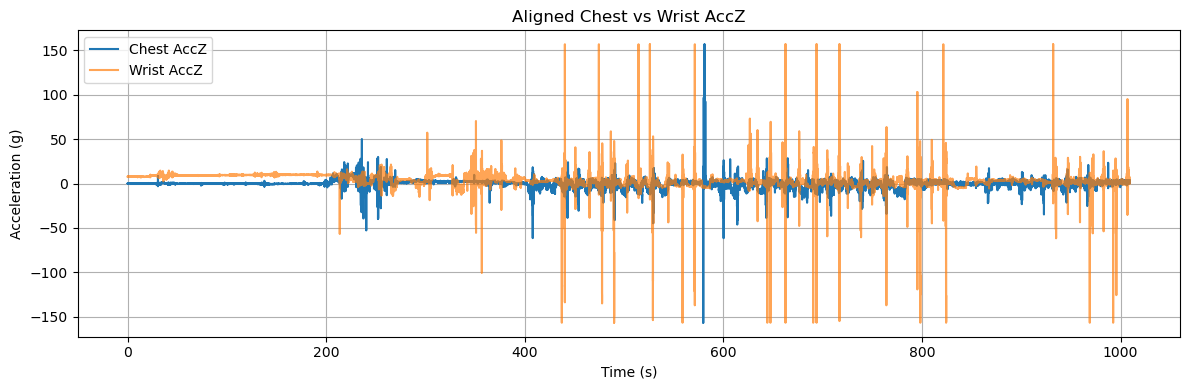

In [89]:
# Check the result
plt.figure(figsize=(12, 4))
plt.plot(df_sync['time'], df_sync['AccZ'], label='Chest AccZ')
plt.plot(df_sync['time'], df_sync['AccZ_wrist'], label='Wrist AccZ', alpha=0.7)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (g)")
plt.title("Aligned Chest vs Wrist AccZ")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

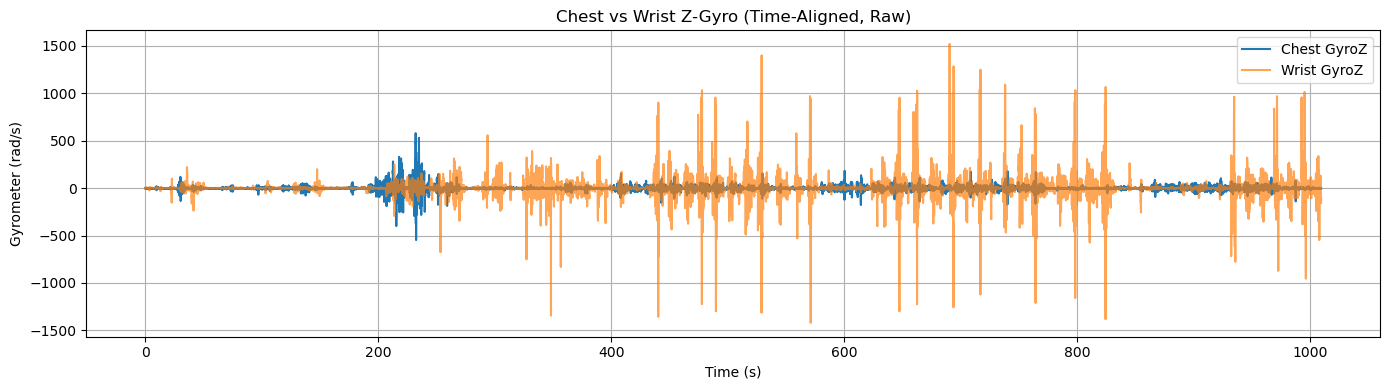

In [90]:
# Visual Sanity Check Gyro
plt.figure(figsize=(14, 4))
plt.plot(df_sync['time'], df_sync['GyroZ'], label='Chest GyroZ')
plt.plot(df_sync['time'], df_sync['GyroZ_wrist'], label='Wrist GyroZ', alpha=0.7) # more transparent
plt.title("Chest vs Wrist Z-Gyro (Time-Aligned, Raw)")
plt.xlabel("Time (s)")
plt.ylabel("Gyrometer (rad/s)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [91]:
print(df_sync['time'].min(), df_sync['time'].max(), len(df_sync))


0.002000093460083008 1009.3210000991821 51276


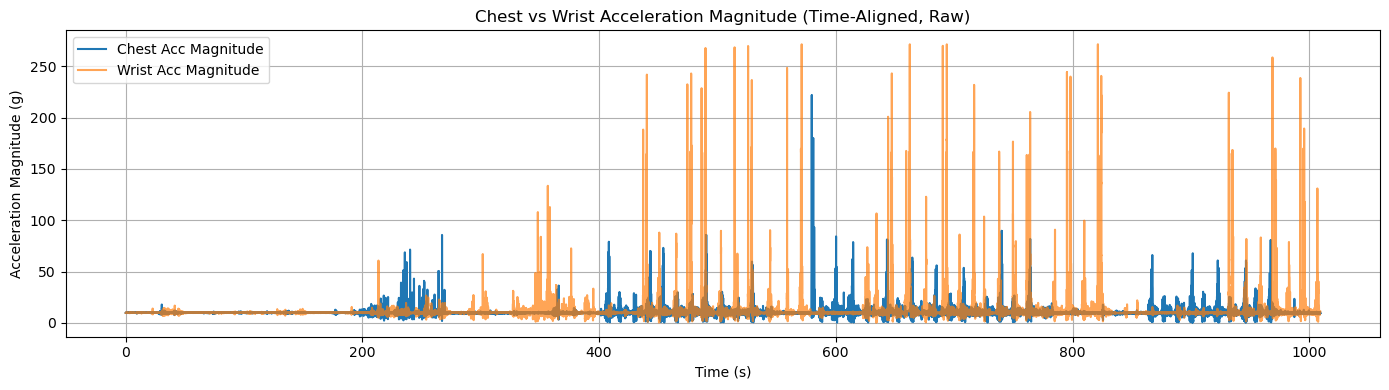

In [92]:
# Sum the x,y,z accelerations to get total acceleration magnitude
df_sync['Acc_Mag'] = np.sqrt(df_sync['AccX']**2 + df_sync['AccY']**2 + df_sync['AccZ']**2)
df_sync['Acc_Mag_wrist'] = np.sqrt(df_sync['AccX_wrist']**2 + df_sync['AccY_wrist']**2 + df_sync['AccZ_wrist']**2)

# Visual Sanity Check Acc Magnitude
plt.figure(figsize=(14, 4))
plt.plot(df_sync['time'], df_sync['Acc_Mag'], label='Chest Acc Magnitude')
plt.plot(df_sync['time'], df_sync['Acc_Mag_wrist'], label='Wrist Acc Magnitude', alpha=0.7) # more transparent
plt.title("Chest vs Wrist Acceleration Magnitude (Time-Aligned, Raw)")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration Magnitude (g)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

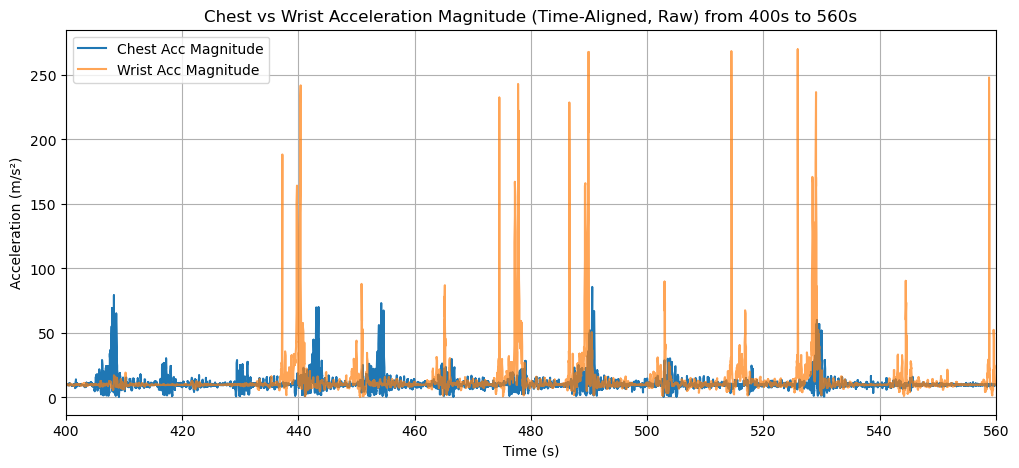

In [93]:
#Plot from 400s to 560s
plt.figure(figsize=(12, 5))
plt.plot(df_sync['time'], df_sync['Acc_Mag'], label='Chest Acc Magnitude')
plt.plot(df_sync['time'], df_sync['Acc_Mag_wrist'], label='Wrist Acc Magnitude', alpha=0.7) # more transparent
plt.title("Chest vs Wrist Acceleration Magnitude (Time-Aligned, Raw) from 400s to 560s")
plt.xlim(400, 560)  # Adjust x-axis limits to zoom in
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.legend()
plt.grid(True)
plt.show()

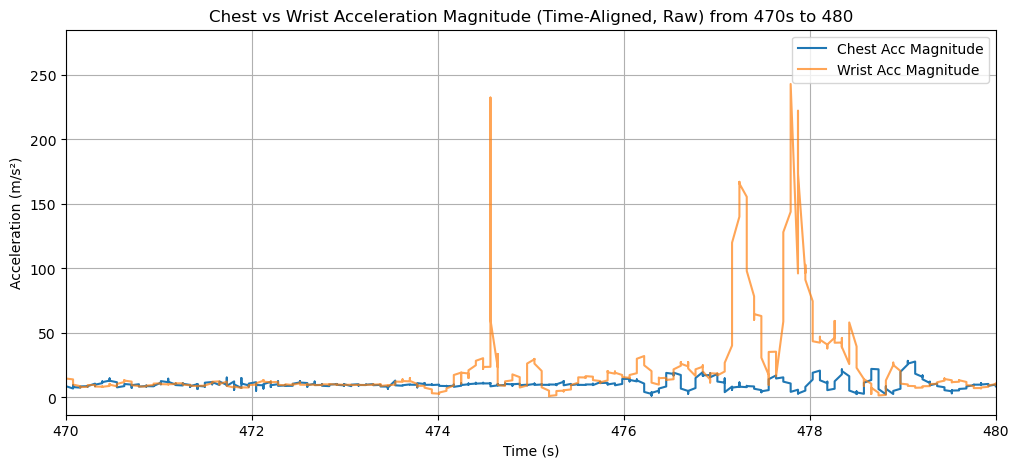

In [94]:
#Plot from 470s to 480s
plt.figure(figsize=(12, 5))
plt.plot(df_sync['time'], df_sync['Acc_Mag'], label='Chest Acc Magnitude')
plt.plot(df_sync['time'], df_sync['Acc_Mag_wrist'], label='Wrist Acc Magnitude', alpha=0.7) # more transparent
plt.title("Chest vs Wrist Acceleration Magnitude (Time-Aligned, Raw) from 470s to 480")
plt.xlim(470, 480)  # Adjust x-axis limits to zoom in
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.legend()
plt.grid(True)
plt.show()

In [95]:
from scipy.signal import butter, filtfilt

rect_acc_chest = df_sync['Acc_Mag']
rect_acc_wrist = df_sync['Acc_Mag_wrist']

# Low-pass filter setup
def butter_lowpass_filter(data, cutoff=0.5, fs=50, order=4):
    nyq = 0.5 * fs
    norm_cutoff = cutoff / nyq
    b, a = butter(order, norm_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

filtered_acc_chest = butter_lowpass_filter(rect_acc_chest, cutoff=0.5, fs=estimated_hz)
filtered_acc_wrist = butter_lowpass_filter(rect_acc_wrist, cutoff=0.5, fs=estimated_hz)

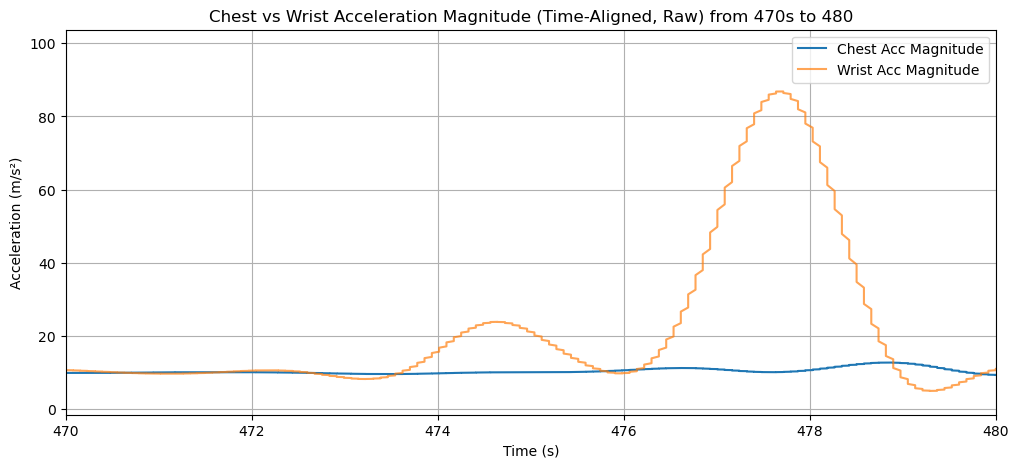

In [96]:
#Plot from 470s to 480s
plt.figure(figsize=(12, 5))
plt.plot(df_sync['time'], filtered_acc_chest, label='Chest Acc Magnitude')
plt.plot(df_sync['time'], filtered_acc_wrist, label='Wrist Acc Magnitude', alpha=0.7) # more transparent
plt.title("Chest vs Wrist Acceleration Magnitude (Time-Aligned, Raw) from 470s to 480")
plt.xlim(470, 480)  # Adjust x-axis limits to zoom in
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.legend()
plt.grid(True)
plt.show()

In [97]:
df_sync.to_csv('synchronized_data.csv', index=False)

### Madgwick filter - imufusion

In [98]:
import imufusion

In [114]:
# # read back in synchronized data as df_sync
# df_sync = pd.read_csv('synchronized_data.csv')

# # Prepare data for processing
timestamp = df_sync['time'].to_numpy()  # seconds
gyroscope_s = df_sync[['GyroX', 'GyroY', 'GyroZ']].to_numpy()
accelerometer = df_sync[['AccX', 'AccY', 'AccZ']].to_numpy()
magnetometer = df_sync[['MagX', 'MagY', 'MagZ']].to_numpy()
# gyroscope_s   = df_sync[["GyroX_wrist","GyroY_wrist","GyroZ_wrist"]].to_numpy()  # rad/s
# accelerometer = df_sync[["AccX_wrist","AccY_wrist","AccZ_wrist"]].to_numpy()     # g
# magnetometer  = df_sync[["MagX_wrist","MagY_wrist","MagZ_wrist"]].to_numpy()     # uT 

# Sampling and delta time
dt = np.diff(timestamp, prepend=timestamp[0])
median_dt = np.median(dt[dt > 0])
dt[dt <= 0] = median_dt

# Replace any zeros/negatives just in case of edge effects
# Estimate sampling rate
time_diffs = df_sync['time'].diff().dropna()
avg_dt = time_diffs.mean()           # average dt (seconds)
sample_rate_est = 1 / avg_dt         # Hz

print(f"Estimated sample rate: {sample_rate_est:.2f} Hz")

# Explicit cast to Python int
offset = imufusion.Offset(int(round(sample_rate_est)))
ahrs = imufusion.Ahrs()
ahrs.settings = imufusion.Settings(
    imufusion.CONVENTION_NWU,  # frame convention
    0.5,                       # gain
    2000,                      # gyro range (deg/s)
    10,                        # accel rejection
    10,                        # mag rejection
    int(5 * sample_rate_est),  # recovery trigger period in samples (~5 s)
)

# Preallocate outputs
n = len(timestamp)
euler_deg       = np.empty((n, 3))
gyro_global     = np.empty_like(gyroscope_s)
accel_global    = np.empty_like(accelerometer)
mag_global      = np.empty_like(magnetometer)
flags           = np.empty((n, 4), dtype=int)
internal_states = np.empty((n, 6))

# Run filter + rotate to global frame each step
for i in range(n):
    gyroscope_s[i] = offset.update(gyroscope_s[i])
    ahrs.update(gyroscope_s[i], accelerometer[i], magnetometer[i], dt[i])

    # Rotation matrix from body → global
    R = ahrs.quaternion.to_matrix()

    # Rotate signals
    gyro_global[i]  = R @ gyroscope_s[i]
    accel_global[i] = R @ accelerometer[i]
    mag_global[i]   = R @ magnetometer[i]

    # Euler
    euler_deg[i] = ahrs.quaternion.to_euler() 

    # Optional diagnostics
    ist = ahrs.internal_states
    internal_states[i] = np.array([
        ist.acceleration_error,
        ist.accelerometer_ignored,
        ist.acceleration_recovery_trigger,
        ist.magnetic_error,
        ist.magnetometer_ignored,
        ist.magnetic_recovery_trigger,
    ])
    fl = ahrs.flags
    flags[i] = np.array([fl.initialising, fl.angular_rate_recovery, fl.acceleration_recovery, fl.magnetic_recovery])

# Build output DataFrame
df_madgwick = pd.DataFrame({
    "time": timestamp,
    
    # Euler angles chest
    "roll_deg_chest":  euler_deg[:,0],
    "pitch_deg_chest": euler_deg[:,1],
    "yaw_deg_chest":   euler_deg[:,2],
    # Global-frame chest signals
    "GyroX_chest_global": gyro_global[:,0],
    "GyroY_chest_global": gyro_global[:,1],
    "GyroZ_chest_global": gyro_global[:,2],
    "AccX_chest_global":  accel_global[:,0],
    "AccY_chest_global":  accel_global[:,1],
    "AccZ_chest_global":  accel_global[:,2],
    "MagX_chest_global":  mag_global[:,0],
    "MagY_chest_global":  mag_global[:,1],
    "MagZ_chest_global":  mag_global[:,2],

    # # Euler angles wrist
    # "roll_deg_wrist":  euler_deg[:,0],
    # "pitch_deg_wrist": euler_deg[:,1],
    # "yaw_deg_wrist":   euler_deg[:,2],
    # # Global-frame wrist signals
    # "GyroX_wrist_global": gyro_global[:,0],
    # "GyroY_wrist_global": gyro_global[:,1],
    # "GyroZ_wrist_global": gyro_global[:,2],
    # "AccX_wrist_global":  accel_global[:,0],
    # "AccY_wrist_global":  accel_global[:,1],
    # "AccZ_wrist_global":  accel_global[:,2],
    # "MagX_wrist_global":  mag_global[:,0],
    # "MagY_wrist_global":  mag_global[:,1],
    # "MagZ_wrist_global":  mag_global[:,2],

    # # Flags 
    # "flag_initialising":          flags[:,0],
    # "flag_angrate_recovery":      flags[:,1],
    # "flag_accel_recovery":        flags[:,2],
    # "flag_magnetic_recovery":     flags[:,3],
    # "accel_err_deg":              internal_states[:,0],
    # "accel_ignored":              internal_states[:,1],
    # "accel_recovery_trigger":     internal_states[:,2],
    # "mag_err_deg":                internal_states[:,3],
    # "mag_ignored":                internal_states[:,4],
    # "mag_recovery_trigger":       internal_states[:,5],
})



Estimated sample rate: 50.80 Hz


In [100]:
print(dt)

[0.079 0.079 0.079 ... 0.079 0.079 0.079]


In [101]:
print(time_diffs)

1        0.000
2        0.000
3        0.000
4        0.079
5        0.000
         ...  
51271    0.000
51272    0.078
51273    0.000
51274    0.000
51275    0.000
Name: time, Length: 51275, dtype: float64


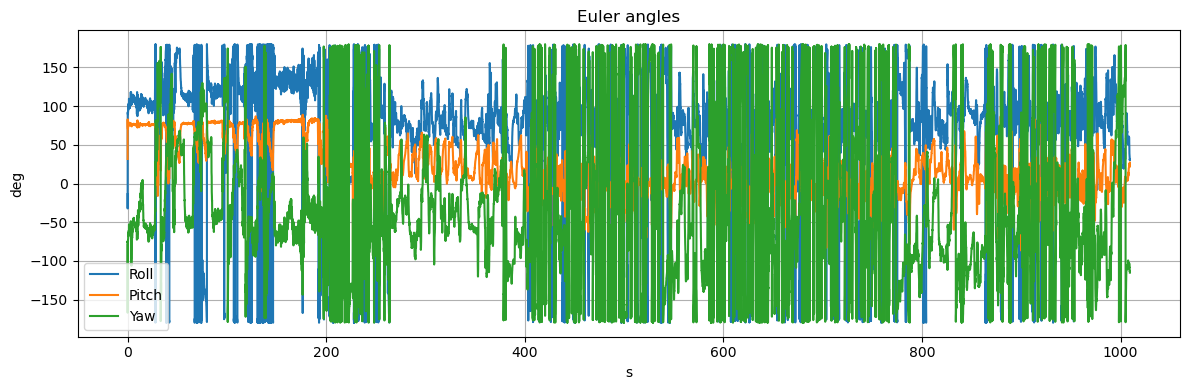

In [115]:
# Quick sanity plot
plt.figure(figsize=(12,4))
plt.plot(df_madgwick["time"], df_madgwick["roll_deg_chest"],  label="Roll")
plt.plot(df_madgwick["time"], df_madgwick["pitch_deg_chest"], label="Pitch")
plt.plot(df_madgwick["time"], df_madgwick["yaw_deg_chest"],   label="Yaw")
# plt.plot(df_madgwick["time"], df_madgwick["roll_deg_wrist"],  label="Roll")
# plt.plot(df_madgwick["time"], df_madgwick["pitch_deg_wrist"], label="Pitch")
# plt.plot(df_madgwick["time"], df_madgwick["yaw_deg_wrist"],   label="Yaw")

plt.ylabel("deg"); plt.xlabel("s"); plt.title("Euler angles"); plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()


0.0 0.07900023460388184 0.01968404321721121


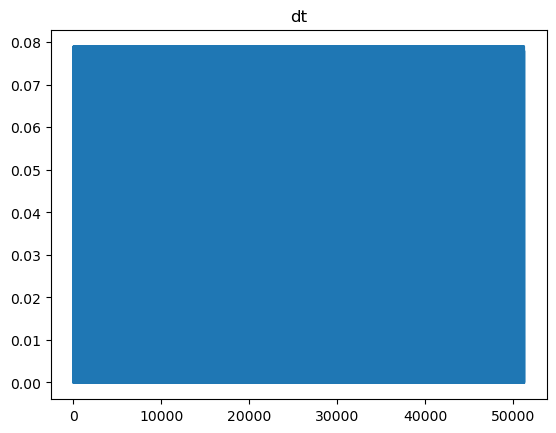

In [103]:
dt = np.diff(timestamp, prepend=timestamp[0])
print(dt.min(), dt.max(), dt.mean())
plt.plot(dt); plt.title('dt'); plt.show()


In [218]:
df_madgwick.head()

,time,roll_deg_wrist,pitch_deg_wrist,yaw_deg_wrist,GyroX_wrist_global,GyroY_wrist_global,GyroZ_wrist_global,AccX_wrist_global,AccY_wrist_global,AccZ_wrist_global,MagX_wrist_global,MagY_wrist_global,MagZ_wrist_global
0,0.002,-21.212173,-12.748998,38.908428,1.715048,-0.842458,0.563805,2.313529,1.033120,9.539174,65.866333,-28.182966,134.499903
1,0.002,-25.868296,-23.354166,57.434448,2.412273,-2.194426,1.629182,0.321921,0.675269,9.894713,45.802611,-22.642287,137.800869
2,0.002,-26.042542,-26.543859,76.042702,3.058820,-2.185064,1.828254,-0.097489,0.172808,9.863796,51.871888,-14.848632,140.090569
3,0.002,-25.465237,-27.533260,87.697731,2.387679,-1.516977,1.360760,-0.087076,0.013057,9.827388,54.301985,-7.090678,138.757263
4,0.081,-25.427614,-27.071232,92.828369,2.617003,-1.829062,1.827465,-0.031349,-0.085720,9.691997,53.291339,-0.852659,138.140724


In [116]:
## Save for reuse
df_madgwick.to_csv("df_madgwick_jonatan_chest.csv", index=False)
# df_madgwick.to_csv("df_madgwick_jonatan_wrist.csv", index=False)
# df_madgwick.to_csv("df_madgwick_david_c.csv", index=False)
# df_madgwick.to_csv("df_madgwick_david_w.csv", index=False)

## Jump detection algorithm analysis

### Import post-madgwick

Linear acceleration converted to g? 
"Algorithm outputs -
The algorithm provides four outputs: quaternion, gravity, linear acceleration, and Earth acceleration. The quaternion describes the orientation of the sensor relative to the Earth. This can be converted to a rotation matrix using the FusionQuaternionToMatrix function or to Euler angles using the FusionQuaternionToEuler function. Gravity is a direction of gravity in the sensor coordinate frame. Linear acceleration is the accelerometer measurement with gravity removed. Earth acceleration is the accelerometer measurement in the Earth coordinate frame with gravity removed. The algorithm supports North-West-Up (NWU), East-North-Up (ENU), and North-East-Down (NED) axes conventions."



In [117]:


df_mad_jonatan_wrist = pd.read_csv('df_madgwick_jonatan_wrist.csv')
df_mad_jonatan_chest = pd.read_csv('df_madgwick_jonatan_chest.csv')

#Load df_sync 
df_sync = pd.read_csv('synchronized_data.csv')

### Plotting

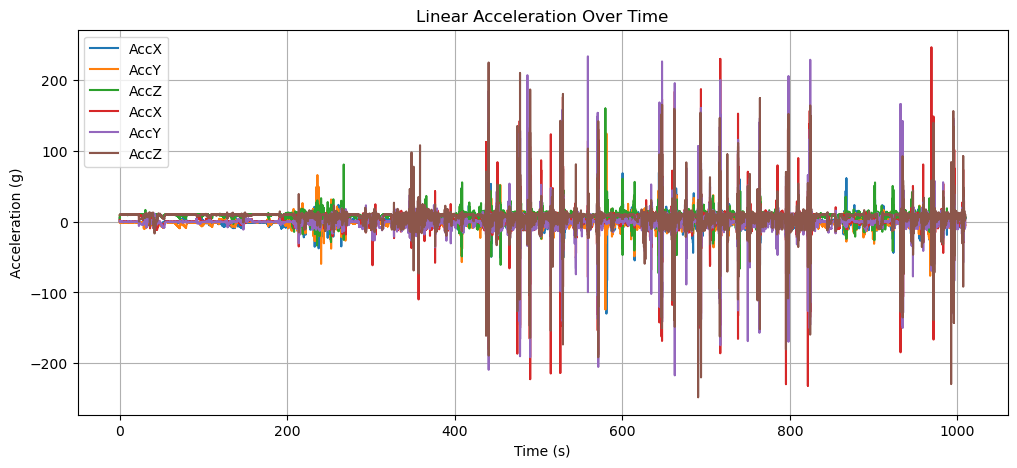

In [118]:
plt.figure(figsize=(12, 5))
plt.plot(df_mad_jonatan_chest['time'], df_mad_jonatan_chest['AccX_chest_global'], label='AccX')
plt.plot(df_mad_jonatan_chest['time'], df_mad_jonatan_chest['AccY_chest_global'], label='AccY')
plt.plot(df_mad_jonatan_chest['time'], df_mad_jonatan_chest['AccZ_chest_global'], label='AccZ')
plt.plot(df_mad_jonatan_wrist['time'], df_mad_jonatan_wrist['AccX_wrist_global'], label='AccX')
plt.plot(df_mad_jonatan_wrist['time'], df_mad_jonatan_wrist['AccY_wrist_global'], label='AccY')
plt.plot(df_mad_jonatan_wrist['time'], df_mad_jonatan_wrist['AccZ_wrist_global'], label='AccZ')
plt.title('Linear Acceleration Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (g)')
plt.legend()
plt.grid(True)
plt.show()


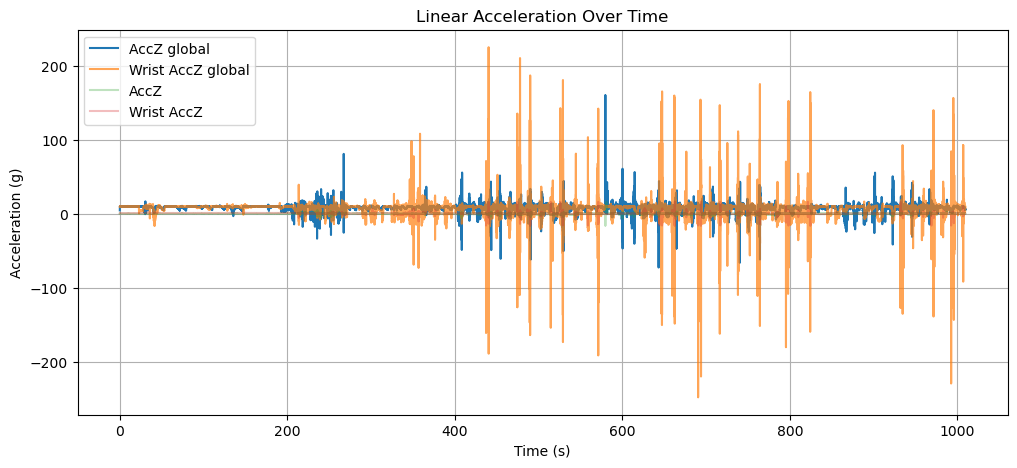

: 

In [ ]:
#Compare Madgwick and raw vertical acceleration
plt.figure(figsize=(12, 5))
plt.plot(df_mad_jonatan_chest['time'], df_mad_jonatan_chest['AccZ_chest_global'], label='AccZ global')
plt.plot(df_mad_jonatan_wrist['time'], df_mad_jonatan_wrist['AccZ_wrist_global'], label='Wrist AccZ global', alpha=0.7)
plt.plot(df_sync['time'], (df_sync['AccZ'])/9.81, label='AccZ', alpha=0.3)
plt.plot(df_sync['time'], (df_sync['AccZ_wrist'])/9.81, label='Wrist AccZ', alpha=0.3)
plt.title('Linear Acceleration Over Time')
# plt.xlim(400, 560)  # Adjust x-axis limits to zoom in
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (g)')
plt.legend()
plt.grid(True)
plt.show()

### Gyro

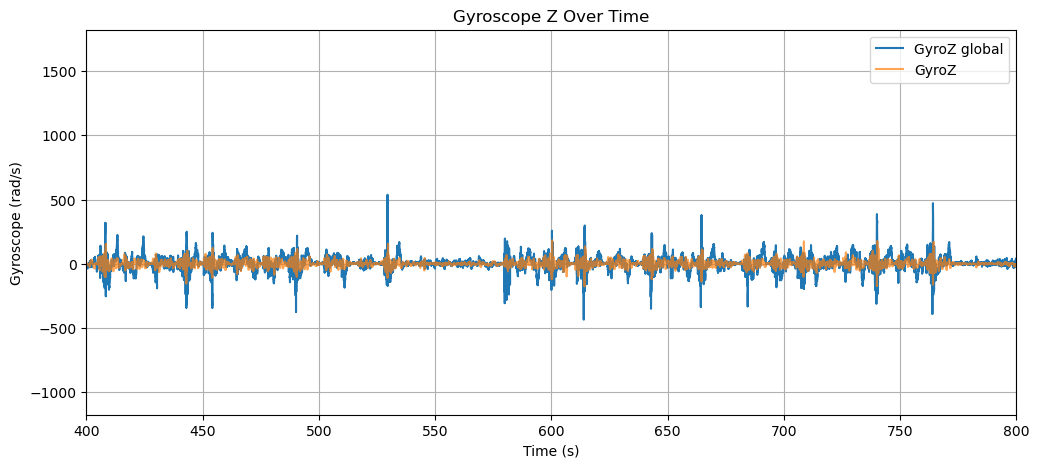

In [119]:
# Compare Madgwick and raw gyro Z with Madgwick Z-gyro
plt.figure(figsize=(12, 5))
plt.plot(df_mad_jonatan_chest['time'], df_mad_jonatan_chest['GyroZ_chest_global'], label='GyroZ global')
plt.plot(df_sync['time'], df_sync['GyroZ'], label='GyroZ', alpha=0.7)
plt.title('Gyroscope Z Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Gyroscope (rad/s)')   
plt.xlim(400, 800)  # Adjust x-axis limits to zoom in  
plt.legend()
plt.grid(True)
plt.show()

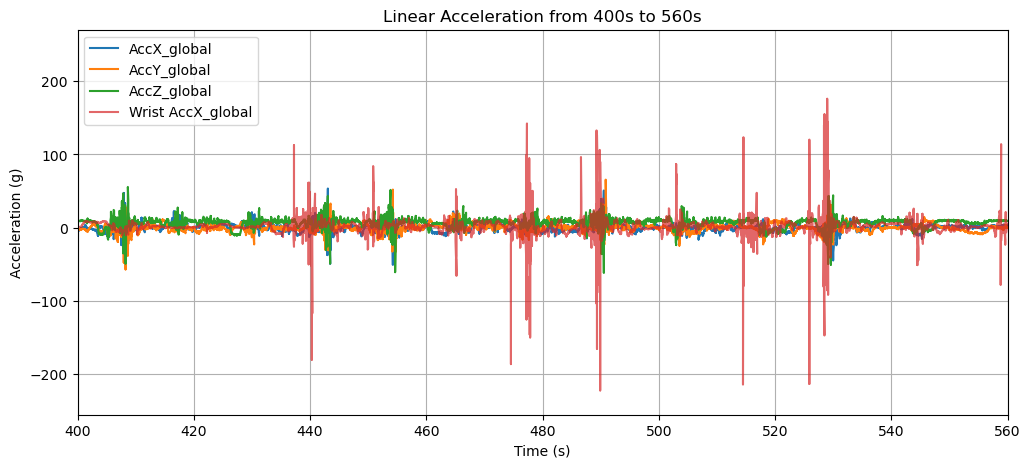

: 

In [ ]:
#Plot from 400s to 560s
plt.figure(figsize=(12, 5))
plt.plot(df_mad_jonatan_chest['time'], df_mad_jonatan_chest['AccX_chest_global'], label='AccX_global')
plt.plot(df_mad_jonatan_chest['time'], df_mad_jonatan_chest['AccY_chest_global'], label='AccY_global')
plt.plot(df_mad_jonatan_chest['time'], df_mad_jonatan_chest['AccZ_chest_global'], label='AccZ_global')
plt.plot(df_mad_jonatan_wrist['time'], df_mad_jonatan_wrist['AccX_wrist_global'], label='Wrist AccX_global', alpha=0.7)
plt.xlim(400, 560)  # Adjust x-axis limits to zoom in
# plt.ylim(-500, 500)  # Adjust y-axis limits if needed
plt.title('Linear Acceleration from 400s to 560s')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (g)')
plt.legend()
plt.grid(True)
plt.show()

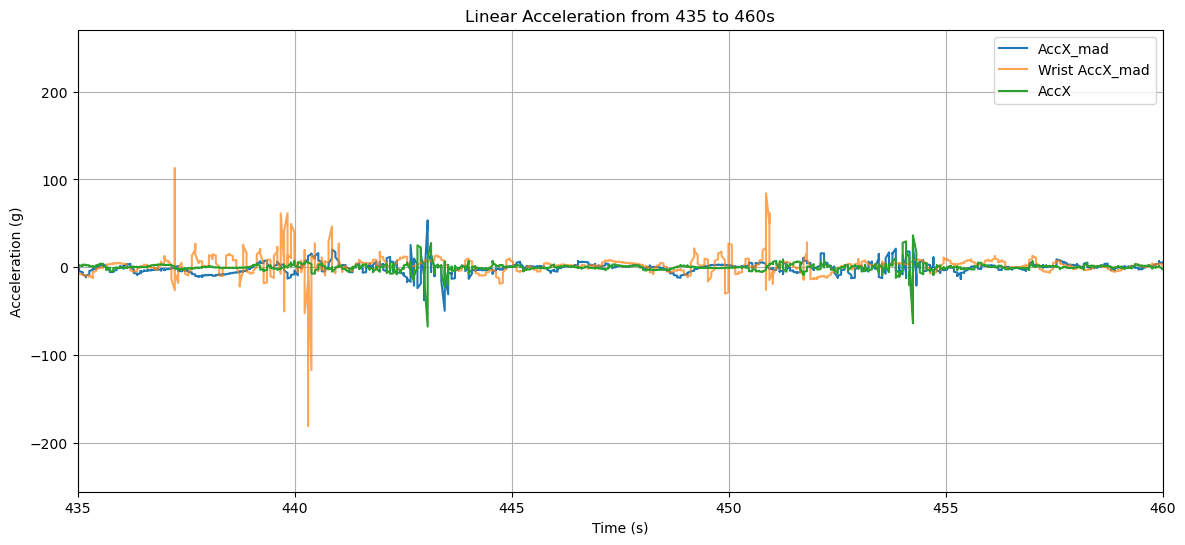

In [120]:
#Plot from 435s to 460s
plt.figure(figsize=(14, 6))
plt.plot(df_mad_jonatan_chest['time'], df_mad_jonatan_chest['AccX_chest_global'], label='AccX_mad')
plt.plot(df_mad_jonatan_wrist['time'], df_mad_jonatan_wrist['AccX_wrist_global'], label='Wrist AccX_mad', alpha=0.7)
plt.plot(df_sync['time'], df_sync['AccX'], label='AccX')
plt.xlim(435, 460)  # Adjust x-axis limits to zoom in
# plt.ylim(-500, 500)  # Adjust y-axis limits 
plt.title('Linear Acceleration from 435 to 460s')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (g)')
plt.legend()
plt.grid(True)
plt.show()

### Filtering and plotting 

Convention is filter first before suimming the linear acceleration as I have started to do here but I lost some characteristic details of the jump acclerations so I have summed first and filtered after, the section below is useful for plotting purposes

In [121]:
from scipy.signal import butter, filtfilt

# Low-pass filter setup
# def butter_lowpass_filter(data, cutoff=1, fs=50, order=4)
def butter_lowpass_filter(data, cutoff=1, fs=136, order=4):
    nyq = 0.5 * fs
    norm_cutoff = cutoff / nyq
    b, a = butter(order, norm_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

filtered_accX_ch = butter_lowpass_filter(df_mad_jonatan_chest['AccX_chest_global'])
filtered_accY_ch = butter_lowpass_filter(df_mad_jonatan_chest['AccY_chest_global'])
filtered_accZ_ch = butter_lowpass_filter(df_mad_jonatan_chest['AccZ_chest_global']) 
filtered_accX_wr = butter_lowpass_filter(df_mad_jonatan_wrist['AccX_wrist_global'])
filtered_accY_wr = butter_lowpass_filter(df_mad_jonatan_wrist['AccY_wrist_global'])
filtered_accZ_wr = butter_lowpass_filter(df_mad_jonatan_wrist['AccZ_wrist_global'])


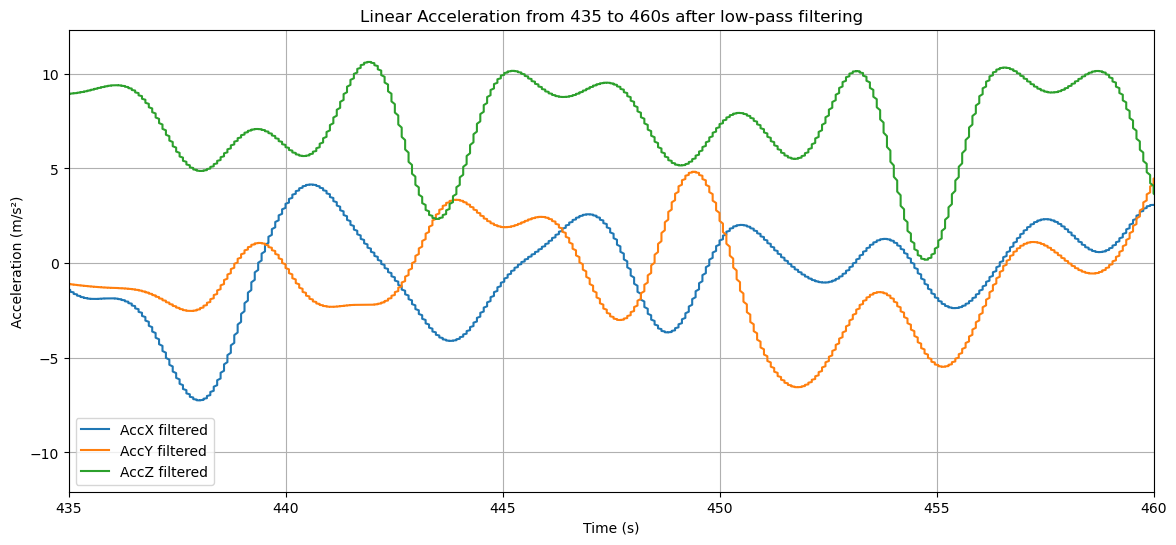

In [122]:
#Plot from 435s to 460s
plt.figure(figsize=(14, 6))
plt.plot(df_mad_jonatan_chest['time'], filtered_accX_ch, label='AccX filtered')
plt.plot(df_mad_jonatan_chest['time'], filtered_accY_ch, label='AccY filtered')
plt.plot(df_mad_jonatan_chest['time'], filtered_accZ_ch, label='AccZ filtered')
plt.xlim(435, 460)  # Adjust x-axis limits to zoom in
# plt.ylim(-500, 500)  # Adjust y-axis limits 
plt.title('Linear Acceleration from 435 to 460s after low-pass filtering')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.legend()
plt.grid(True)
plt.show()

In [123]:
estimated_hz

np.float64(50.801580074990476)

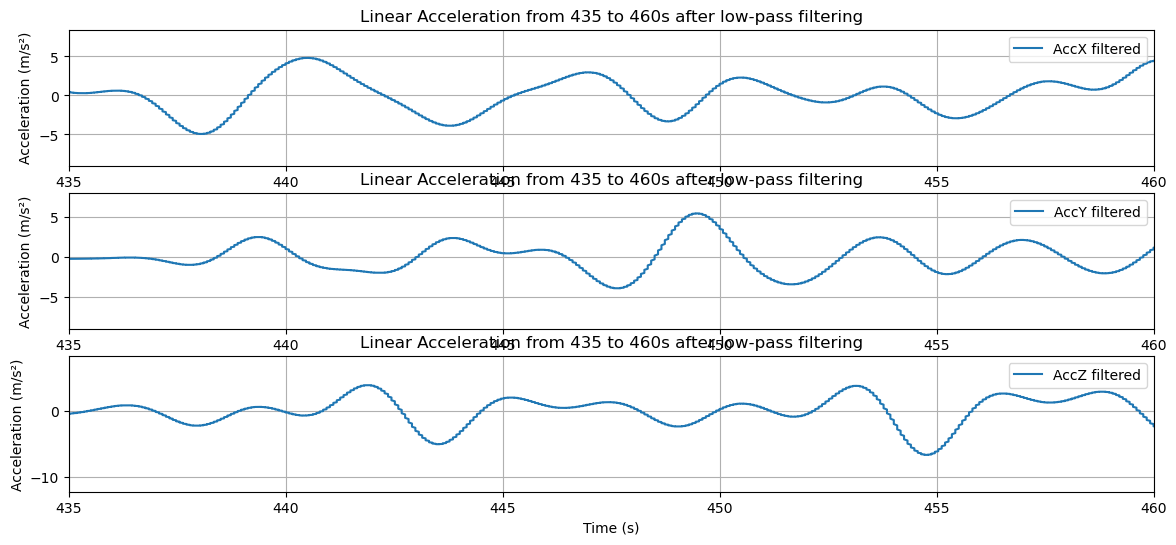

In [124]:
from scipy import integrate

def butter_highpass_filter(data, cutoff=0.1, fs=136, order=4):
# def butter_highpass_filter(data, cutoff=0.1, fs=50, order=4):
    nyq = 0.5 * fs
    norm_cutoff = cutoff / nyq
    b, a = butter(order, norm_cutoff, btype='high', analog=False)
    return filtfilt(b, a, data)

filtered_accX_ch = butter_highpass_filter(filtered_accX_ch, cutoff=0.1, fs=estimated_hz)
filtered_accY_ch = butter_highpass_filter(filtered_accY_ch, cutoff=0.1, fs=estimated_hz)
filtered_accZ_ch = butter_highpass_filter(filtered_accZ_ch, cutoff=0.1, fs=estimated_hz)
filtered_accX_wr = butter_highpass_filter(filtered_accX_wr, cutoff=0.1, fs=estimated_hz)
filtered_accY_wr = butter_highpass_filter(filtered_accY_wr, cutoff=0.1, fs=estimated_hz)
filtered_accZ_wr = butter_highpass_filter(filtered_accZ_wr, cutoff=0.1, fs=estimated_hz)

#Plot from 435s to 460s
plt.subplots(figsize=(14, 6), nrows=3, ncols=1)

plt.subplot(3, 1, 1)
plt.plot(df_mad_jonatan_chest['time'], filtered_accX_ch, label='AccX filtered')
plt.xlim(435, 460)  # Adjust x-axis limits to zoom in
# plt.ylim(-500, 500)  # Adjust y-axis limits 
plt.title('Linear Acceleration from 435 to 460s after low-pass filtering')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.legend()
plt.grid(True)  

plt.subplot(3, 1, 2)
plt.plot(df_mad_jonatan_chest['time'], filtered_accY_ch, label='AccY filtered')
plt.xlim(435, 460)  # Adjust x-axis limits to zoom in
# plt.ylim(-500, 500)  # Adjust y-axis limits 
plt.title('Linear Acceleration from 435 to 460s after low-pass filtering')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.legend()
plt.grid(True)  

plt.subplot(3, 1, 3)
plt.plot(df_mad_jonatan_chest['time'], filtered_accZ_ch, label='AccZ filtered')
plt.xlim(435, 460)  # Adjust x-axis limits to zoom in
# plt.ylim(-500, 500)  # Adjust y-axis limits 
plt.title('Linear Acceleration from 435 to 460s after low-pass filtering')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.legend()
plt.grid(True)
plt.show()

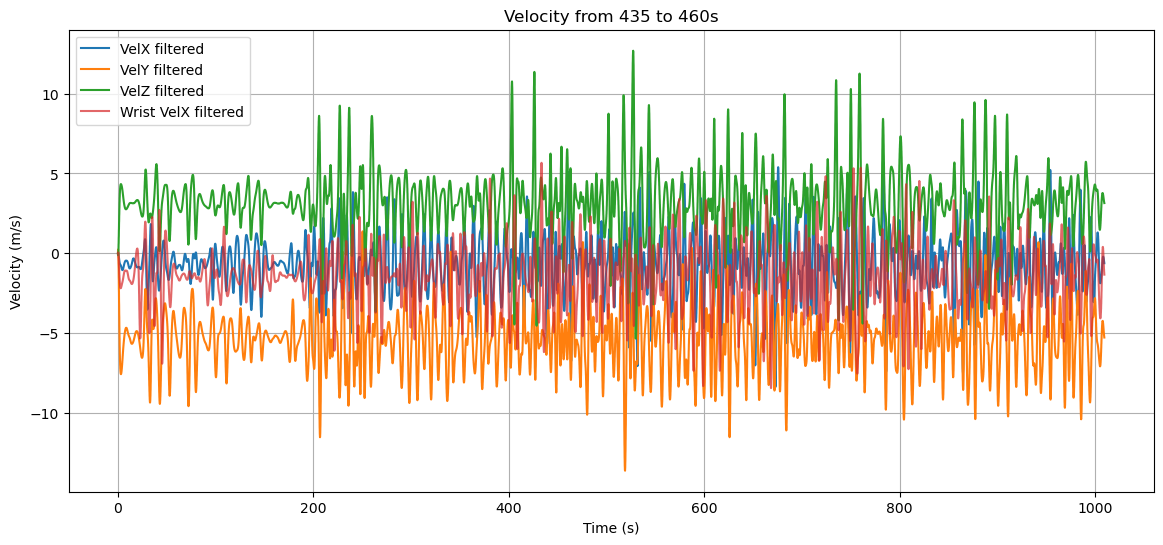

In [125]:


# # Plot different axies of velocity
filtered_velX_ch = integrate.cumulative_trapezoid(filtered_accX_ch, dx=1/estimated_hz, initial=0)
filtered_velY_ch = integrate.cumulative_trapezoid(filtered_accY_ch, dx=1/estimated_hz, initial=0)
filtered_velZ_ch = integrate.cumulative_trapezoid(filtered_accZ_ch, dx=1/estimated_hz, initial=0)

filtered_velX_wr = integrate.cumulative_trapezoid(filtered_accX_wr, dx=1/estimated_hz, initial=0)
filtered_velY_wr = integrate.cumulative_trapezoid(filtered_accY_wr, dx=1/estimated_hz, initial=0)
filtered_velZ_wr = integrate.cumulative_trapezoid(filtered_accZ_wr, dx=1/estimated_hz, initial=0)


#Plot from 435s to 460s
plt.figure(figsize=(14, 6))
plt.plot(df_mad_jonatan_chest['time'], filtered_velX_ch, label='VelX filtered')
plt.plot(df_mad_jonatan_chest['time'], filtered_velY_ch, label='VelY filtered')
plt.plot(df_mad_jonatan_chest['time'], filtered_velZ_ch, label='VelZ filtered')
plt.plot(df_mad_jonatan_wrist['time'], filtered_velX_wr, label='Wrist VelX filtered', alpha=0.7)

# plt.xlim(435, 460)  # Adjust x-axis limits to zoom in
# plt.ylim(-500, 500)  # Adjust y-axis limits 
plt.title('Velocity from 435 to 460s')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.grid(True)
plt.show()

<!-- ### Clean -->

In [126]:
# print(np.isnan(df_mad_jonatan_chest['AccZ_chest_global']).sum(), np.isnan(df_mad_jonatan_chest['AccY_chest_global']).sum(), np.isnan(df_mad_jonatan_chest['AccX_chest_global']).sum())

In [127]:
# # Drop rows with any NaN in AccX, AccY, or AccZ
# # df_clean = df.dropna(subset=['AccX', 'AccY', 'AccZ'])
# df_clean = df.dropna(subset=['AccX_global', 'AccY_global', 'AccZ_global'])

### Sum the acceleration

Summing acceleration before actually band-pass filtering led to less noisy signal for some reason,  I guess because you remove the characteristic extremities of jump accelerations?

In [128]:
acc_x_chest = df_mad_jonatan_chest['AccX_chest_global'].values
acc_y_chest = df_mad_jonatan_chest['AccY_chest_global'].values
acc_z_chest = df_mad_jonatan_chest['AccZ_chest_global'].values
acc_x_wrist = df_mad_jonatan_wrist['AccX_wrist_global'].values
acc_y_wrist = df_mad_jonatan_wrist['AccY_wrist_global'].values
acc_z_wrist = df_mad_jonatan_wrist['AccZ_wrist_global'].values

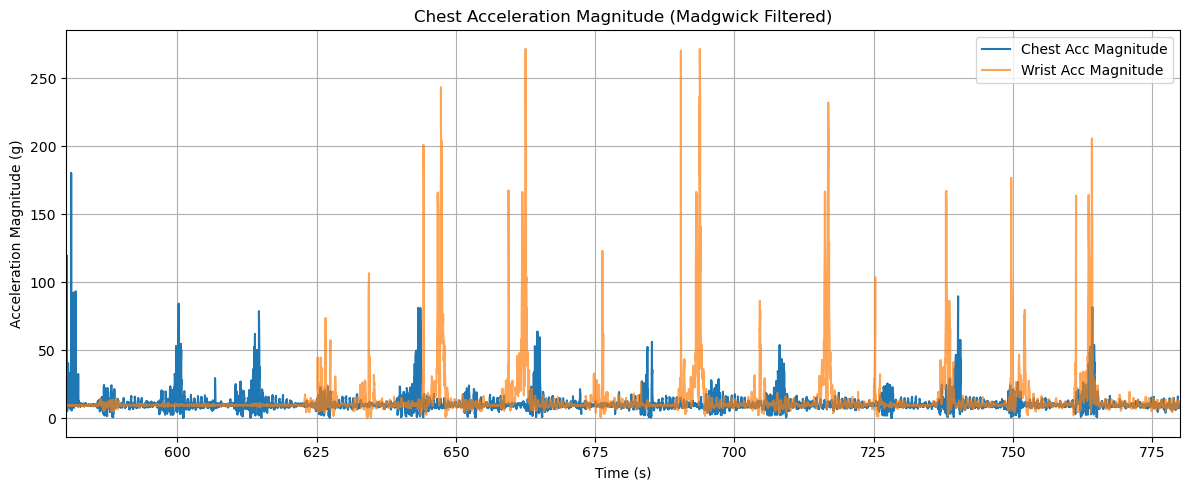

In [129]:
# # Rectify acceleration by summing the squares of each axis and taking the square root 
# df_mad_jonatan_chest['Acc_Mag_chest'] = np.sqrt(filtered_accX_ch**2 + filtered_accY_ch**2 + filtered_accZ_ch**2)
# df_mad_jonatan_wrist['Acc_Mag_wrist'] = np.sqrt(filtered_accX_wr**2 + filtered_accY_wr**2 + filtered_accZ_wr**2)

# Rectify acceleration by summing the squares of each axis and taking the square root
df_mad_jonatan_chest['Acc_Mag_chest'] = np.sqrt(acc_x_chest**2 + acc_y_chest**2 + acc_z_chest**2)
df_mad_jonatan_wrist['Acc_Mag_wrist'] = np.sqrt(acc_x_wrist**2 + acc_y_wrist**2 + acc_z_wrist**2)

# Plot the rectified acceleration
plt.figure(figsize=(12, 5))
plt.plot(df_mad_jonatan_chest['time'], df_mad_jonatan_chest['Acc_Mag_chest'], label='Chest Acc Magnitude')
plt.plot(df_mad_jonatan_wrist['time'], df_mad_jonatan_wrist['Acc_Mag_wrist'], label='Wrist Acc Magnitude', alpha=0.7) #       more transparent
plt.title("Chest Acceleration Magnitude (Madgwick Filtered)")
plt.xlim(580, 780)  # Adjust x-axis limits to zoom in
plt.xlabel("Time (s)")
plt.ylabel("Acceleration Magnitude (g)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### High and Low-pass Filtering

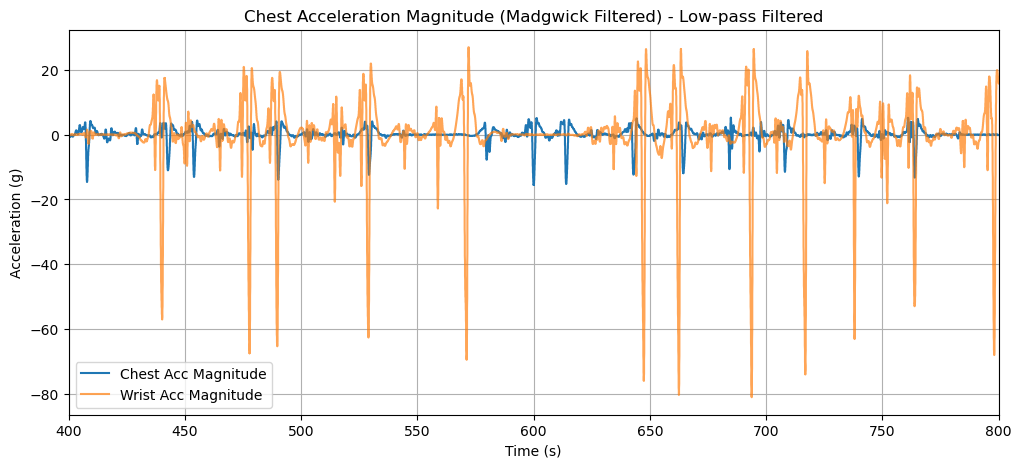

In [130]:
# Low-pass filter the rectified acceleration
filtered_acc_ch = butter_lowpass_filter(df_mad_jonatan_chest['Acc_Mag_chest'], cutoff=1, fs=estimated_hz)
filtered_acc_wr = butter_lowpass_filter(df_mad_jonatan_wrist['Acc_Mag_wrist'] , cutoff=1, fs=estimated_hz)

# High-pass filter the rectified acceleration to remove drift
filtered_acc_ch = butter_highpass_filter(-filtered_acc_ch, cutoff=0.1, fs=estimated_hz) # MINUS sign to invert the signal after summing and filtering
filtered_acc_wr = butter_highpass_filter(-filtered_acc_wr, cutoff=0.1, fs=estimated_hz)

#Plot
plt.figure(figsize=(12, 5))
plt.plot(df_mad_jonatan_chest['time'], filtered_acc_ch, label='Chest Acc Magnitude')
plt.plot(df_mad_jonatan_wrist['time'], filtered_acc_wr, label='Wrist Acc Magnitude', alpha=0.7) # more transparent
plt.title("Chest Acceleration Magnitude (Madgwick Filtered) - Low-pass Filtered")
plt.xlim(400, 800)  # Adjust x-axis limits to zoom in
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (g)')
plt.legend()
plt.grid(True)
plt.show()

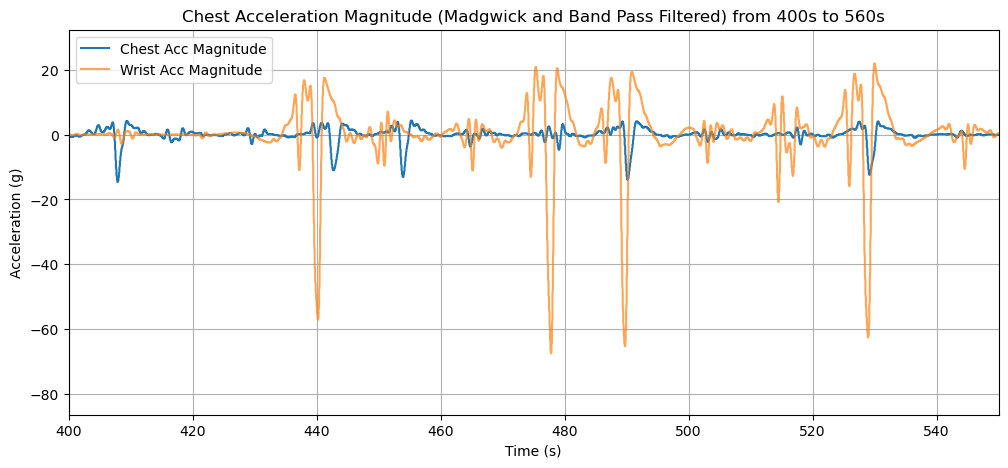

In [131]:
#Plot from 400s to 550s
plt.figure(figsize=(12, 5))
plt.plot(df_mad_jonatan_chest['time'], filtered_acc_ch, label='Chest Acc Magnitude')
plt.plot(df_mad_jonatan_wrist['time'], filtered_acc_wr, label='Wrist Acc Magnitude', alpha=0.7) # more transparent
plt.title("Chest Acceleration Magnitude (Madgwick and Band Pass Filtered) from 400s to 560s")
plt.xlim(400, 550)  # Adjust x-axis limits to zoom in
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (g)')
plt.legend()
plt.grid(True)
plt.show()

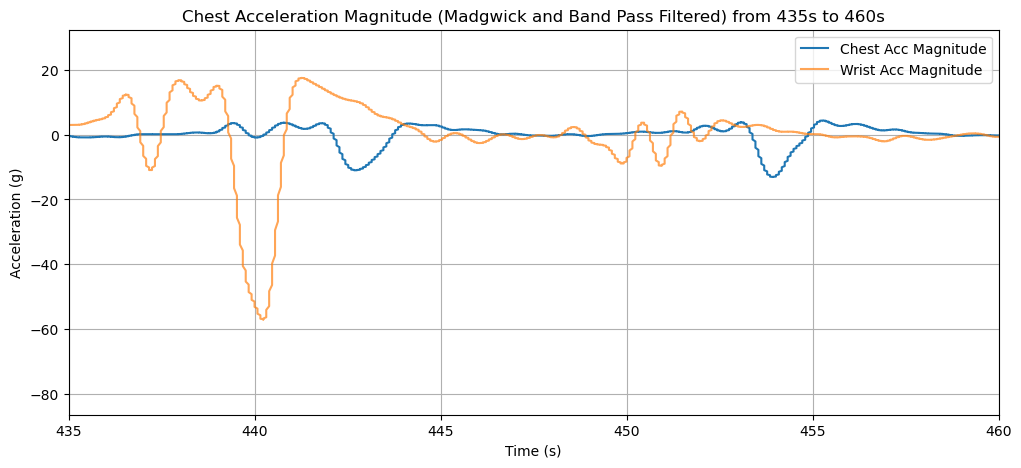

In [132]:
#Plot from 435s to 460s
plt.figure(figsize=(12, 5))
plt.plot(df_mad_jonatan_chest['time'], filtered_acc_ch, label='Chest Acc Magnitude')
plt.plot(df_mad_jonatan_wrist['time'], filtered_acc_wr, label='Wrist Acc Magnitude', alpha=0.7) # more transparent
plt.title("Chest Acceleration Magnitude (Madgwick and Band Pass Filtered) from 435s to 460s")
plt.xlim(435, 460)  # Adjust x-axis limits to zoom in
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (g)')
plt.legend()
plt.grid(True)
plt.show()

### Trapezoidal integration for velocity

In [133]:
# Trapezoidal integration to get velocity
vel_ch = integrate.cumulative_trapezoid(filtered_acc_ch, dx=1/estimated_hz, initial=0)
vel_wr = integrate.cumulative_trapezoid(filtered_acc_wr, dx=1/estimated_hz, initial=0)

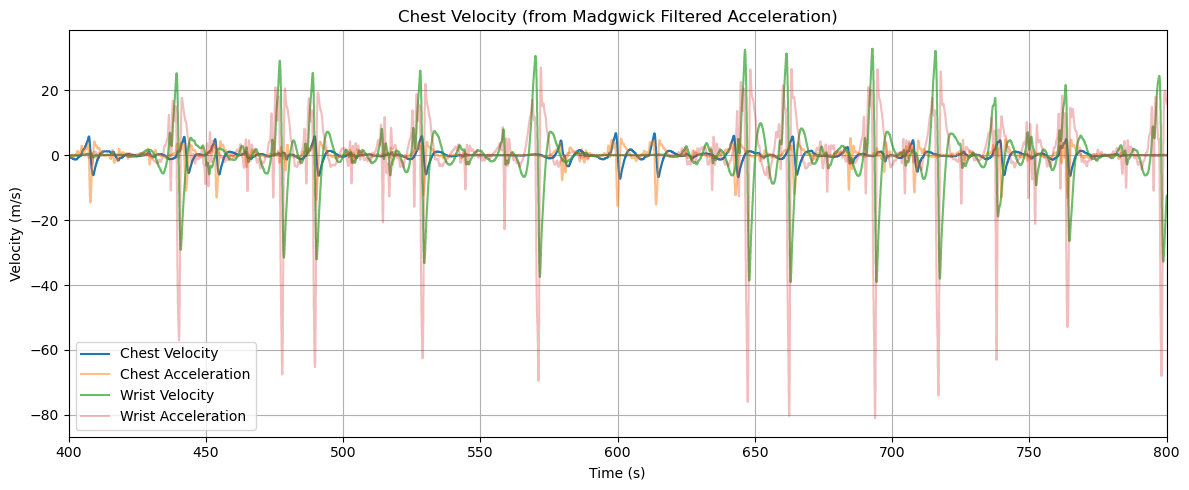

In [134]:

# Plot the velocity
plt.figure(figsize=(12, 5))
plt.plot(df_mad_jonatan_chest['time'], vel_ch, label='Chest Velocity')
plt.plot(df_mad_jonatan_chest['time'], filtered_acc_ch, label='Chest Acceleration', alpha=0.5)
plt.plot(df_mad_jonatan_wrist['time'], vel_wr, label='Wrist Velocity', alpha=0.7) # more transparent
plt.plot(df_mad_jonatan_wrist['time'], filtered_acc_wr, label='Wrist Acceleration', alpha=0.3) # more transparent
plt.title("Chest Velocity (from Madgwick Filtered Acceleration)")
plt.xlim(400, 800)  # Adjust x-axis limits to zoom in
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

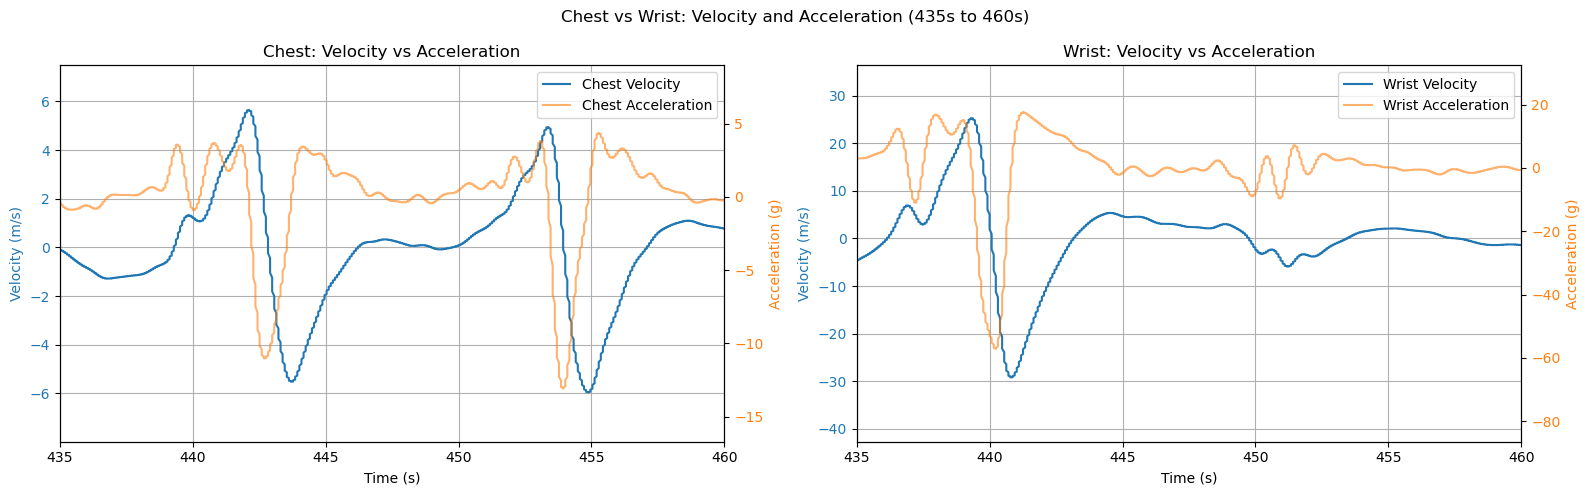

In [135]:
# Plot velocity and acceleration for Chest and Wrist
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(16, 5), sharex=True)

# Chest subplot
ax1.plot(df_mad_jonatan_chest['time'], vel_ch, color="tab:blue", label='Chest Velocity')
ax1.set_xlim(435, 460)
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Velocity (m/s)", color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(df_mad_jonatan_chest['time'], filtered_acc_ch,
         color="tab:orange", alpha=0.6, label='Chest Acceleration')
ax2.set_ylabel("Acceleration (g)", color="tab:orange")
ax2.tick_params(axis='y', labelcolor="tab:orange")

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")
ax1.set_title("Chest: Velocity vs Acceleration")

# Wrist subplot 
ax3.plot(df_mad_jonatan_wrist['time'], vel_wr, color="tab:blue", label='Wrist Velocity')
ax3.set_xlim(435, 460)
ax3.set_xlabel("Time (s)")
ax3.set_ylabel("Velocity (m/s)", color="tab:blue")
ax3.tick_params(axis='y', labelcolor="tab:blue")
ax3.grid(True)

ax4 = ax3.twinx()
ax4.plot(df_mad_jonatan_wrist['time'], filtered_acc_wr,
         color="tab:orange", alpha=0.6, label='Wrist Acceleration')
ax4.set_ylabel("Acceleration (g)", color="tab:orange")
ax4.tick_params(axis='y', labelcolor="tab:orange")

lines_3, labels_3 = ax3.get_legend_handles_labels()
lines_4, labels_4 = ax4.get_legend_handles_labels()
ax3.legend(lines_3 + lines_4, labels_3 + labels_4, loc="upper right")
ax3.set_title("Wrist: Velocity vs Acceleration")

plt.suptitle("Chest vs Wrist: Velocity and Acceleration (435s to 460s)")
plt.tight_layout()
plt.show()



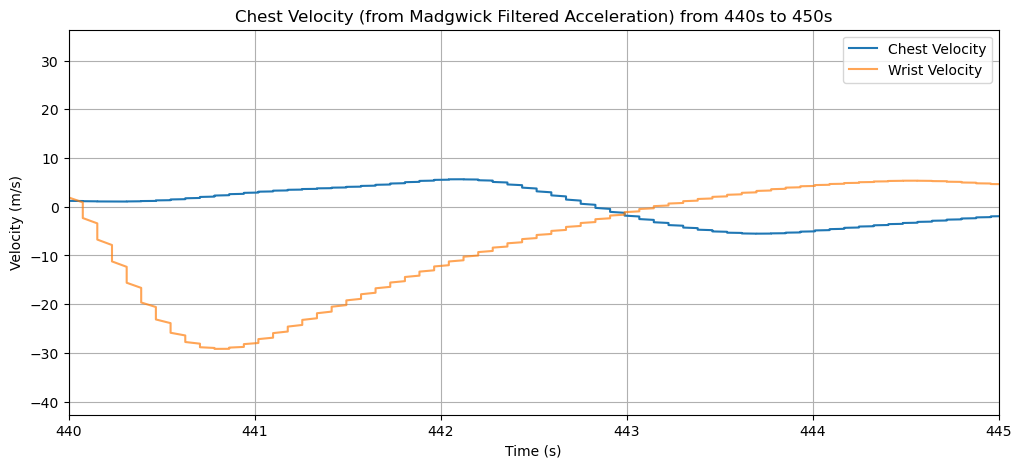

In [136]:
#Plot from 440s to 450s
plt.figure(figsize=(12, 5))
plt.plot(df_mad_jonatan_chest['time'], vel_ch, label='Chest Velocity')
plt.plot(df_mad_jonatan_wrist['time'], vel_wr, label='Wrist Velocity', alpha=0.7) # more transparent
plt.title("Chest Velocity (from Madgwick Filtered Acceleration) from 440s to 450s")
plt.xlim(440, 445)  # Adjust x-axis limits to zoom in
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.grid(True)
plt.show()

### Zero velocity update

/opt/miniconda3/envs/imu_logger/lib/python3.10/site-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/opt/miniconda3/envs/imu_logger/lib/python3.10/site-packages/scipy/interpolate/_interpolate.py:482: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


[Chest] ZUPT applied – 863 stance samples reset
[Wrist] ZUPT applied – 791 stance samples reset
[Chest] ZUPT applied – 863 stance samples reset
[Wrist] ZUPT applied – 791 stance samples reset


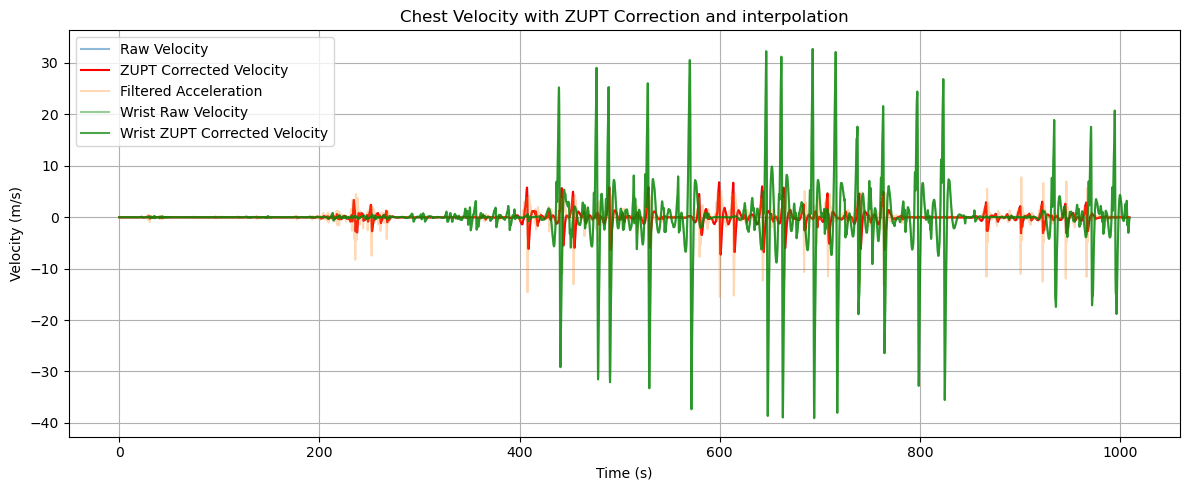

In [137]:
# Zero-Velocity Update (ZUPT) Implementation
from scipy.interpolate import interp1d

def apply_zupt(accel_mag, velocity, time, sensor_name="", stance_range=(0.90, 1.10)):
    """    
    Parameters
    
    accel_mag : array-like
        Magnitude of acceleration signal (in g).
    velocity : array-like
        Integrated velocity signal (same length as accel_mag).
    time : array-like
        Time array (in seconds).
    sensor_name : str, optional
        For printing/debugging (e.g. 'Chest' or 'Wrist').
    stance_range : tuple
        Min and max g values considered as 'stance' (default: 0.90-1.10 g).
    
    Returns
    
    vel_corrected : np.ndarray
        Velocity with ZUPT applied.
    stance : np.ndarray (bool)
        Boolean mask of stance points.
    """

    # Detect stance
    stance = pd.Series(accel_mag).between(stance_range[0], stance_range[1]).to_numpy()

    # Apply ZUPT
    vel_corrected = velocity.copy()
    vel_corrected[stance] = 0.0

    # Interpolate across stance zones to smooth transitions
    not_stance = ~stance
    interp_func = interp1d(
        time[not_stance],
        vel_corrected[not_stance],
        bounds_error=False,
        fill_value="extrapolate",
    )
    vel_corrected = interp_func(time)

    if sensor_name:
        print(f"[{sensor_name}] ZUPT applied – {stance.sum()} stance samples reset")

    return vel_corrected, stance


# Apply ZUPT to both chest and wrist velocities
vel_corrected_ch, stance_ch = apply_zupt(filtered_acc_ch, vel_ch, df_mad_jonatan_chest['time'].values, sensor_name="Chest")
vel_corrected_wr, stance_wr = apply_zupt(filtered_acc_wr, vel_wr, df_mad_jonatan_wrist['time'].values, sensor_name="Wrist")


# Apply ZUPT to both chest and wrist filtered acceleration
accel_corrected_ch, stance_ch = apply_zupt(filtered_acc_ch, filtered_acc_ch, df_mad_jonatan_chest['time'].values, sensor_name="Chest")
accel_corrected_wr, stance_wr = apply_zupt(filtered_acc_wr, filtered_acc_wr, df_mad_jonatan_wrist['time'].values, sensor_name="Wrist")

# Plot the corrected velocity
plt.figure(figsize=(12, 5))
plt.plot(df_mad_jonatan_chest['time'], vel_ch, label='Raw Velocity', alpha=0.5)
plt.plot(df_mad_jonatan_chest['time'], vel_corrected_ch, label='ZUPT Corrected Velocity', color='red')
plt.plot(df_mad_jonatan_chest['time'], accel_corrected_ch, label='Filtered Acceleration', alpha=0.3)
plt.plot(df_mad_jonatan_wrist['time'], vel_wr, label='Wrist Raw Velocity', alpha=0.5)
plt.plot(df_mad_jonatan_wrist['time'], vel_corrected_wr, label='Wrist ZUPT Corrected Velocity', color='green', alpha=0.7)
plt.title("Chest Velocity with ZUPT Correction and interpolation")
# plt.xlim(400, 800)  # Adjust x-axis limits to zoom in
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


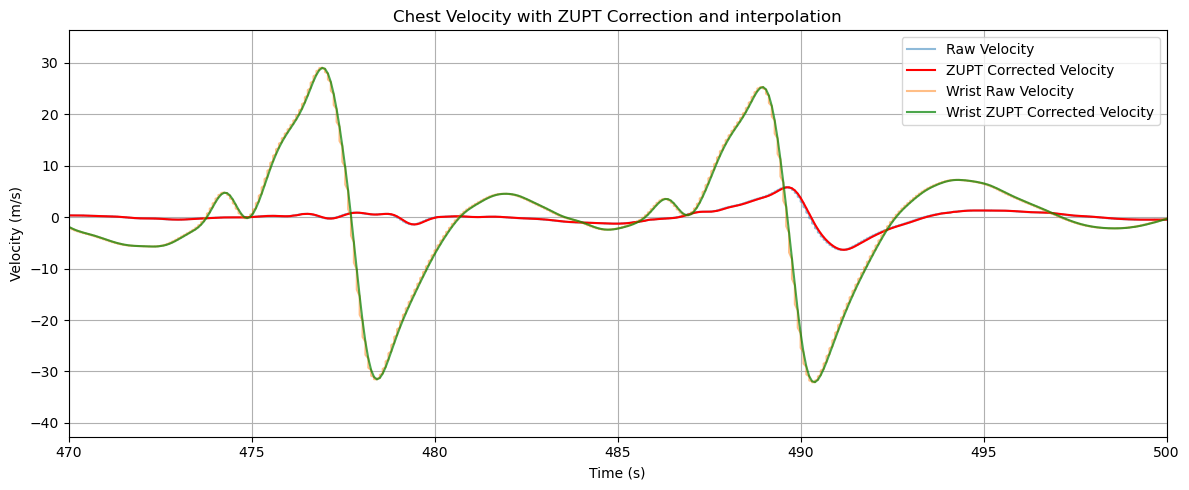

In [138]:
# Plot the corrected velocity
plt.figure(figsize=(12, 5))
plt.plot(df_mad_jonatan_chest['time'], vel_ch, label='Raw Velocity', alpha=0.5)
plt.plot(df_mad_jonatan_chest['time'], vel_corrected_ch, label='ZUPT Corrected Velocity', color='red')
plt.plot(df_mad_jonatan_wrist['time'], vel_wr, label='Wrist Raw Velocity', alpha=0.5)
plt.plot(df_mad_jonatan_wrist['time'], vel_corrected_wr, label='Wrist ZUPT Corrected Velocity', color='green', alpha=0.7) 
plt.title("Chest Velocity with ZUPT Correction and interpolation")
plt.xlim(470, 500)  # Adjust x-axis limits to zoom in
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/90/zl66g5qj47l1drgbk3nfzk_40000gn/T/ipykernel_7391/3124847754.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


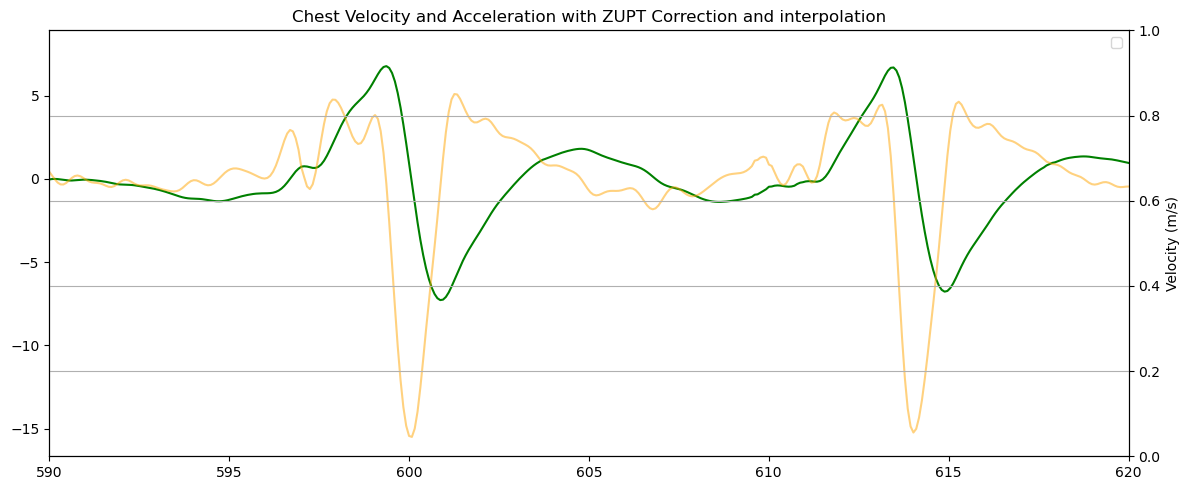

In [ ]:
# Plot the corrected velocity against acceleration
plt.figure(figsize=(12, 5))
plt.plot(df_mad_jonatan_chest['time'], vel_corrected_ch, label='ZUPT Corrected Velocity', color='green')
plt.plot(df_mad_jonatan_chest['time'], accel_corrected_ch, label='ZUPT Filtered Acceleration', alpha=0.5, color='orange') 
plt.title("Chest Velocity and Acceleration with ZUPT Correction and interpolation")
plt.xlim(590, 620)  # Adjust x-axis limits to zoom in
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Find peaks and detect

In [139]:
from scipy.signal import find_peaks

def detect_jumps_by_velocity_peaks(vel_signal, time, sensor_name="", 
                                   pos_height=2, neg_height=2, distance=50,
                                   min_duration=0.2, max_duration=2.0, fs=52,
                                   takeoff_offset=10):
    """
    Detect jumps based on velocity peaks:
        - Takeoff: a few indices after the positive (highest) peak
        - Landing: next negative peak (downward velocity)
    
    Parameters
    ----------
    vel_signal : array
        Filtered velocity signal (ZUPT-corrected)
    time : array
        Time vector (same length as vel_signal)
    sensor_name : str
        For printing/debugging (e.g. 'Chest' or 'Wrist') 
    pos_height, neg_height : float
        Peak thresholds (in m/s)
    distance : int
        Minimum distance between peaks (samples)
    min_duration, max_duration : float
        Flight duration bounds (seconds)
    fs : int
        Sampling frequency
    takeoff_offset : int
        Number of indices to shift after the positive peak for takeoff

    Returns
    -------
    jump_epochs : list of (takeoff_idx, landing_idx)
    """
    
    # Detect positive and negative peaks
    peaks_positive, _ = find_peaks(vel_signal, height=pos_height, distance=distance)
    peaks_negative, _ = find_peaks(-vel_signal, height=neg_height, distance=distance)

    if sensor_name:
        print(f"[{sensor_name}] Found {len(peaks_positive)} upward (+) peaks and {len(peaks_negative)} downward (-) peaks")


    jump_epochs = []

    # For each positive peak, shift by takeoff_offset then find landing
    for pos_peak in peaks_positive:
        takeoff_idx = pos_peak + takeoff_offset  # shift a few indices after the positive peak
        # Find the first landing index after the (shifted) takeoff
        landings_after = [p for p in peaks_negative if p > takeoff_idx]
        if len(landings_after) == 0:
            continue
        landing_idx = landings_after[0]

        # Compute flight time using the original 
        flight_time = time[landing_idx] - time[takeoff_idx]
        if min_duration <= flight_time <= max_duration:
            jump_epochs.append((takeoff_idx, landing_idx))

    print(f"[{sensor_name}] Detected {len(jump_epochs)} valid jumps.")
    return jump_epochs, peaks_negative, peaks_positive


In [140]:
# Apply to chest sensor
jump_epochs, neg_peaks, pos_peaks = detect_jumps_by_velocity_peaks(
    vel_corrected_ch, 
    df_mad_jonatan_chest['time'].to_numpy(), 
    sensor_name="Chest",
    pos_height=2,
    neg_height=2,
    distance=50,
    min_duration=0.1,
    max_duration=2.0,
    fs=52
)

# Mark jumps
df_mad_jonatan_chest['is_jump'] = 0
for start, end in jump_epochs:
    df_mad_jonatan_chest.iloc[start:end+1, df_mad_jonatan_chest.columns.get_loc('is_jump')] = 1


[Chest] Found 22 upward (+) peaks and 27 downward (-) peaks
[Chest] Detected 20 valid jumps.


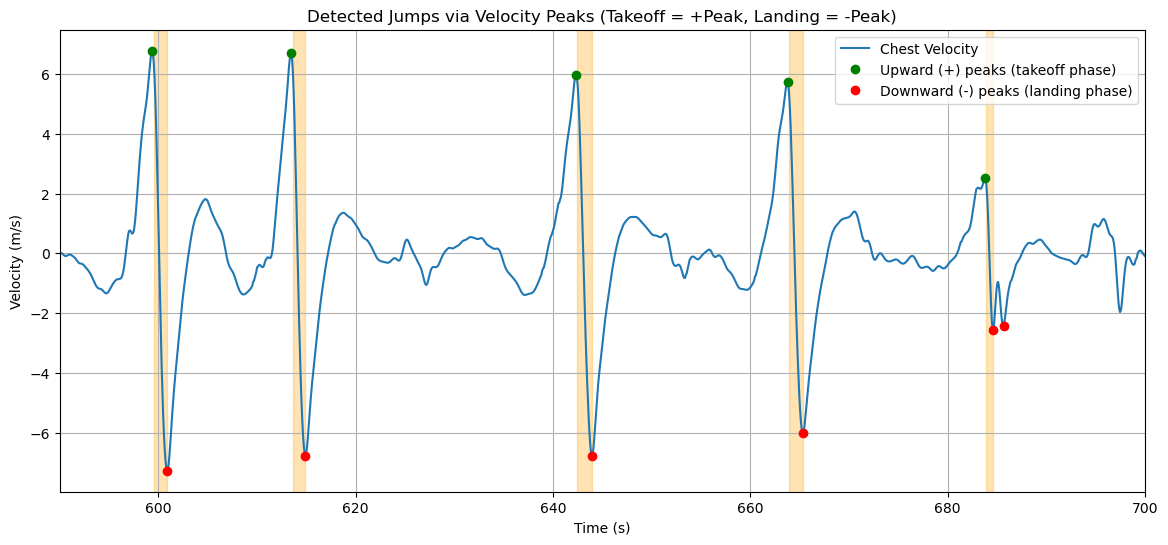

In [141]:
plt.figure(figsize=(14,6))
plt.plot(df_mad_jonatan_chest['time'], vel_corrected_ch, label="Chest Velocity")

# Plot pos peaks
plt.plot(df_mad_jonatan_chest['time'].iloc[pos_peaks], vel_corrected_ch[pos_peaks],
         "go", label="Upward (+) peaks (takeoff phase)")

# Plot neg peaks
plt.plot(df_mad_jonatan_chest['time'].iloc[neg_peaks], vel_corrected_ch[neg_peaks],
         "ro", label="Downward (-) peaks (landing phase)")


# Highlight flight phases
for start, end in jump_epochs:
    plt.axvspan(df_mad_jonatan_chest['time'].iloc[start],
                df_mad_jonatan_chest['time'].iloc[end],
                color='orange', alpha=0.3)

plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.xlim(590, 700)
plt.title("Detected Jumps via Velocity Peaks (Takeoff = +Peak, Landing = -Peak)")
plt.legend()
plt.grid(True)
plt.show()


In [142]:
#List of detected flight phases (start and end indices)
jump_epochs

[(np.int64(11923), np.int64(12001)),
 (np.int64(12783), np.int64(12837)),
 (np.int64(20707), np.int64(20777)),
 (np.int64(22471), np.int64(22545)),
 (np.int64(23043), np.int64(23109)),
 (np.int64(24887), np.int64(24953)),
 (np.int64(26867), np.int64(26937)),
 (np.int64(30459), np.int64(30525)),
 (np.int64(31175), np.int64(31237)),
 (np.int64(32639), np.int64(32713)),
 (np.int64(33731), np.int64(33801)),
 (np.int64(34747), np.int64(34781)),
 (np.int64(35955), np.int64(36029)),
 (np.int64(37571), np.int64(37637)),
 (np.int64(38791), np.int64(38857)),
 (np.int64(44003), np.int64(44037)),
 (np.int64(45739), np.int64(45769)),
 (np.int64(46855), np.int64(46885)),
 (np.int64(48027), np.int64(48057)),
 (np.int64(49083), np.int64(49113))]

In [143]:
# Calculate time in air for each detected jump using time between takeoff and landing peaks
jump_durations = []
for start, end in jump_epochs:
    time_in_air = df_mad_jonatan_chest['time'].iloc[end] - df_mad_jonatan_chest['time'].iloc[start]
    jump_durations.append(time_in_air)

# Print results
for i, duration in enumerate(jump_durations):
    print(f"Jump {i+1}: Time in air = {duration:.3f} seconds") 

Jump 1: Time in air = 1.575 seconds
Jump 2: Time in air = 1.102 seconds
Jump 3: Time in air = 1.417 seconds
Jump 4: Time in air = 1.497 seconds
Jump 5: Time in air = 1.338 seconds
Jump 6: Time in air = 1.338 seconds
Jump 7: Time in air = 1.417 seconds
Jump 8: Time in air = 1.339 seconds
Jump 9: Time in air = 1.260 seconds
Jump 10: Time in air = 1.496 seconds
Jump 11: Time in air = 1.417 seconds
Jump 12: Time in air = 0.709 seconds
Jump 13: Time in air = 1.496 seconds
Jump 14: Time in air = 1.339 seconds
Jump 15: Time in air = 1.339 seconds
Jump 16: Time in air = 0.708 seconds
Jump 17: Time in air = 0.630 seconds
Jump 18: Time in air = 0.630 seconds
Jump 19: Time in air = 0.630 seconds
Jump 20: Time in air = 0.630 seconds


## Calculate Jump height 

Jump 1: Estimated Jump Height = 3.042 m
Jump 2: Estimated Jump Height = 1.489 m
Jump 3: Estimated Jump Height = 2.462 m
Jump 4: Estimated Jump Height = 2.748 m
Jump 5: Estimated Jump Height = 2.195 m
Jump 6: Estimated Jump Height = 2.195 m
Jump 7: Estimated Jump Height = 2.462 m
Jump 8: Estimated Jump Height = 2.199 m
Jump 9: Estimated Jump Height = 1.947 m
Jump 10: Estimated Jump Height = 2.744 m
Jump 11: Estimated Jump Height = 2.462 m
Jump 12: Estimated Jump Height = 0.616 m
Jump 13: Estimated Jump Height = 2.744 m
Jump 14: Estimated Jump Height = 2.199 m
Jump 15: Estimated Jump Height = 2.199 m
Jump 16: Estimated Jump Height = 0.615 m
Jump 17: Estimated Jump Height = 0.487 m
Jump 18: Estimated Jump Height = 0.487 m
Jump 19: Estimated Jump Height = 0.487 m
Jump 20: Estimated Jump Height = 0.487 m


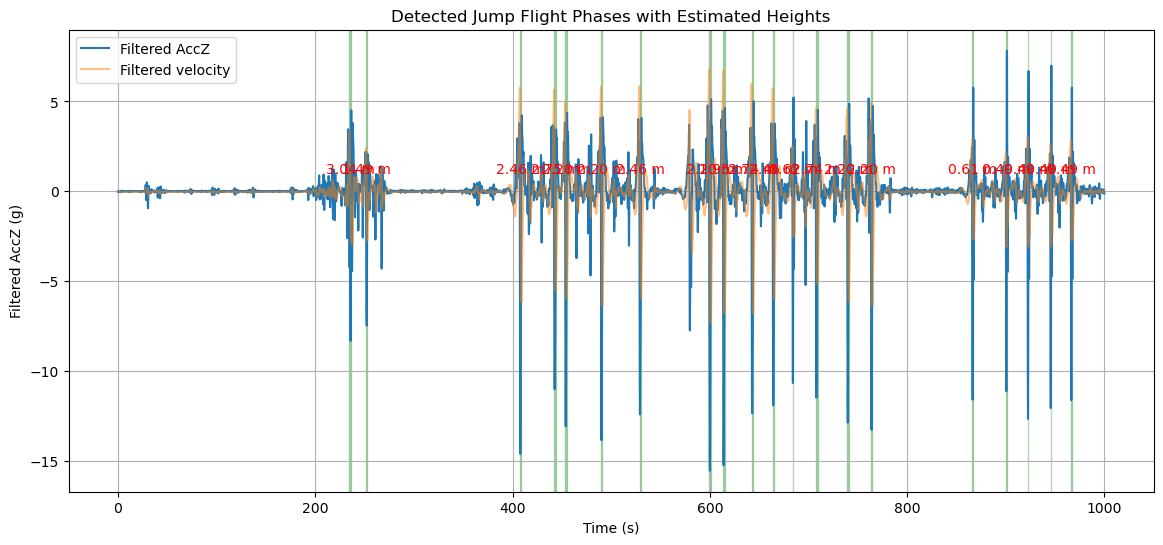

In [144]:
# Calculate Jump height from flight time
jump_heights = []
for duration in jump_durations:
    # height = (duration**2) / 8  # removed gravity because we are calculating in g?
    height = (duration**2) * 9.81 / 8.0  # in meters
    jump_heights.append(height)

# Print results
for i, height in enumerate(jump_heights):
    print(f"Jump {i+1}: Estimated Jump Height = {height:.3f} m")

# Midpoint time of each jump
jump_times = [
    (df_mad_jonatan_chest['time'].iloc[start] + df_mad_jonatan_chest['time'].iloc[end]) / 2
    for start, end in jump_epochs
]

# Create mask 
start_time = 0
end_time = 1000
mask = (df_mad_jonatan_chest['time'] >= start_time) & (df_mad_jonatan_chest['time'] <= end_time)

# Plot data in selected range with jump annotations
plt.figure(figsize=(14, 6))
plt.plot(df_mad_jonatan_chest['time'][mask], filtered_acc_ch[mask], label='Filtered AccZ')
plt.plot(df_mad_jonatan_chest['time'][mask], vel_corrected_ch[mask], label='Filtered velocity', alpha=0.5) 
for (start, end), height, time in zip(jump_epochs, jump_heights, jump_times):
    if start_time <= df_mad_jonatan_chest['time'].iloc[start] <= end_time:
        plt.axvspan(df_mad_jonatan_chest['time'].iloc[start],
                    df_mad_jonatan_chest['time'].iloc[end],
                    color='green', alpha=0.3)
        plt.text(time, 1, f"{height:.2f} m", color='red', ha='center')
plt.title('Detected Jump Flight Phases with Estimated Heights')
plt.xlabel('Time (s)')
plt.ylabel('Filtered AccZ (g)')
plt.legend()
plt.grid(True)
plt.show()

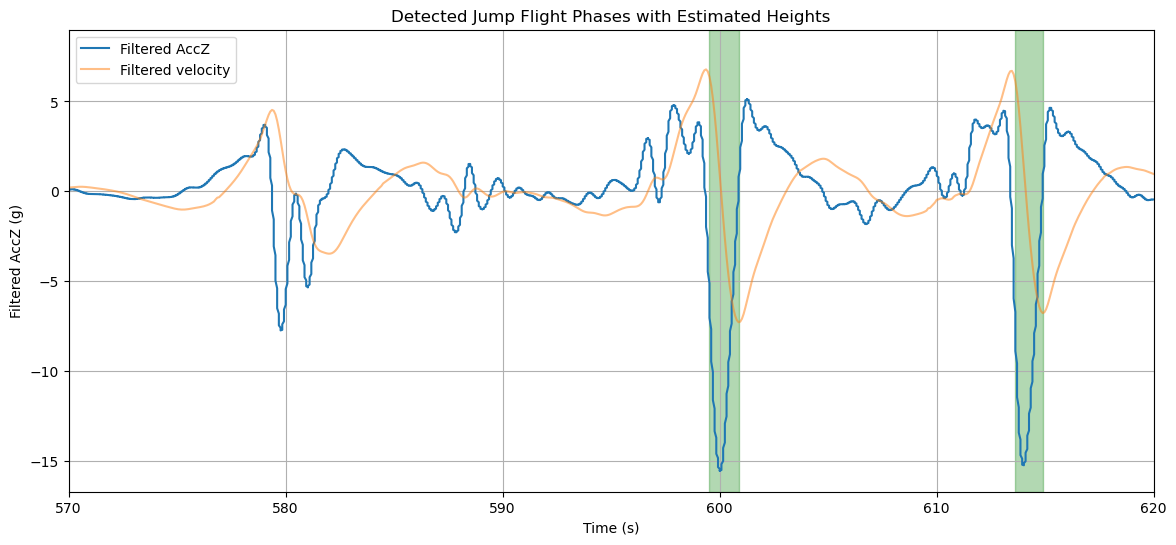

In [145]:
# Plot data in selected range with jump annotations

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df_mad_jonatan_chest['time'][mask], filtered_acc_ch[mask], label='Filtered AccZ')
ax.plot(df_mad_jonatan_chest['time'][mask], vel_corrected_ch[mask], label='Filtered velocity', alpha=0.5) 

for (start, end), height, time in zip(jump_epochs, jump_heights, jump_times):
    if start_time <= df_mad_jonatan_chest['time'].iloc[start] <= end_time:
        ax.axvspan(df_mad_jonatan_chest['time'].iloc[start],
                   df_mad_jonatan_chest['time'].iloc[end],
                   color='green', alpha=0.3)
        # put text near the top of the y-axis, not above spikes
        ylim = ax.get_ylim()
        y_pos = ylim[1] - 0.1*(ylim[1]-ylim[0])  


plt.title('Detected Jump Flight Phases with Estimated Heights')
plt.xlim(570,620)
plt.xlabel('Time (s)')
plt.ylabel('Filtered AccZ (g)')
plt.legend()
plt.grid(True)
plt.show()

## Build ML model 

### Feature extraction

In [279]:
from scipy.stats import skew, kurtosis

# Window settings
window_size = int(estimated_hz * 2.0)  # 1 second
stride = int(estimated_hz * 0.25)      # 75% overlap

features = []
timestamps = []

for start in range(0, len(df_mad_jonatan_chest) - window_size, stride):
    end = start + window_size
    window = vel_corrected_ch[start:end]

    ts = df_mad_jonatan_chest['time'].iloc[start]
    
    features.append([
        np.mean(window),
        np.std(window),
        np.max(window),
        np.min(window),
        np.ptp(window),            # Peak-to-peak
        np.argmax(window),         # Index of peak
        np.argmin(window),         # Index of trough
        skew(window),
        kurtosis(window),
        vel_corrected_ch[start:end].mean()  # Average velocity in the window
    ])
    timestamps.append(ts)




In [280]:
# Create DataFrame
X = pd.DataFrame(features, columns=[
    'mean', 'std', 'max', 'min', 'ptp', 'argmax', 'argmin', 'skew', 'kurtosis', 'mean_velocity'
])


In [281]:
def is_in_jump_window(t, windows):
    for start, end in windows:
        if start <= t <= end:
            return 1
    return 0

y = [is_in_jump_window(t, jump_epochs) for t in timestamps]


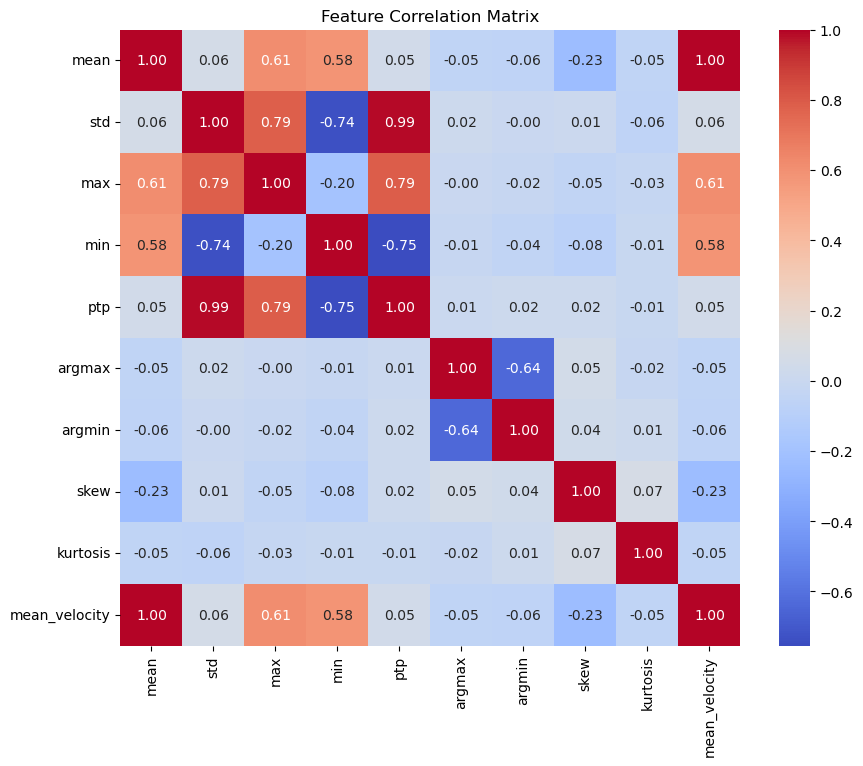

<Figure size 640x480 with 0 Axes>

In [282]:
# Feature correlation matrix
import seaborn as sns
plt.figure(figsize=(10, 8))
corr = X.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()
plt.tight_layout()  

### Train a model

In [ ]:
#Train model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [286]:
# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train) 

y_pred = model.predict(X_test)

In [421]:
# #Evaluate model with confusion matrix and classification report
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# # Compute confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# # Display confusion matrix
# cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
# cm_display.plot()
# plt.show()

# # Print classification report
# print(classification_report(y_test, y_pred))
